http://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib import keras
import string

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.utils import np_utils

In [21]:
np.random.seed(7)

In [27]:
alphabet = string.ascii_uppercase
len(alphabet)

26

In [28]:
# define the raw dataset
alphabet = string.ascii_uppercase
# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))


In [555]:
# 1. takes text or any input data = alphabet
# 2. separates it into two lists: dataX = list with elements of length seq_length 
# 3. dataY = with elements that is immediately next to the last element of seq_length

# prepare the dataset of input to output pairs encoded as integers
seq_length = 5

dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
    seq_in = alphabet[i:i + seq_length]

    seq_out = alphabet[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
    print(seq_in, '->', seq_out)

ABCDE -> F
BCDEF -> G
CDEFG -> H
DEFGH -> I
EFGHI -> J
FGHIJ -> K
GHIJK -> L
HIJKL -> M
IJKLM -> N
JKLMN -> O
KLMNO -> P
LMNOP -> Q
MNOPQ -> R
NOPQR -> S
OPQRS -> T
PQRST -> U
QRSTU -> V
RSTUV -> W
STUVW -> X
TUVWX -> Y
UVWXY -> Z


In [556]:
dataX

[[0, 1, 2, 3, 4],
 [1, 2, 3, 4, 5],
 [2, 3, 4, 5, 6],
 [3, 4, 5, 6, 7],
 [4, 5, 6, 7, 8],
 [5, 6, 7, 8, 9],
 [6, 7, 8, 9, 10],
 [7, 8, 9, 10, 11],
 [8, 9, 10, 11, 12],
 [9, 10, 11, 12, 13],
 [10, 11, 12, 13, 14],
 [11, 12, 13, 14, 15],
 [12, 13, 14, 15, 16],
 [13, 14, 15, 16, 17],
 [14, 15, 16, 17, 18],
 [15, 16, 17, 18, 19],
 [16, 17, 18, 19, 20],
 [17, 18, 19, 20, 21],
 [18, 19, 20, 21, 22],
 [19, 20, 21, 22, 23],
 [20, 21, 22, 23, 24]]

In [160]:
"""We need to reshape the NumPy array into a format expected by the LSTM networks,
that is [samples, time steps, features]."""

# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (len(dataX), seq_length, 1))
X

array([[[ 0]],

       [[ 1]],

       [[ 2]],

       [[ 3]],

       [[ 4]],

       [[ 5]],

       [[ 6]],

       [[ 7]],

       [[ 8]],

       [[ 9]],

       [[10]],

       [[11]],

       [[12]],

       [[13]],

       [[14]],

       [[15]],

       [[16]],

       [[17]],

       [[18]],

       [[19]],

       [[20]],

       [[21]],

       [[22]],

       [[23]],

       [[24]]])

In [161]:
"""Once reshaped, we can then normalize the input integers to the range 0-to-1,
the range of the sigmoid activation functions used by the LSTM network.
"""
X = X / float(len(alphabet))
X

array([[[ 0.        ]],

       [[ 0.03846154]],

       [[ 0.07692308]],

       [[ 0.11538462]],

       [[ 0.15384615]],

       [[ 0.19230769]],

       [[ 0.23076923]],

       [[ 0.26923077]],

       [[ 0.30769231]],

       [[ 0.34615385]],

       [[ 0.38461538]],

       [[ 0.42307692]],

       [[ 0.46153846]],

       [[ 0.5       ]],

       [[ 0.53846154]],

       [[ 0.57692308]],

       [[ 0.61538462]],

       [[ 0.65384615]],

       [[ 0.69230769]],

       [[ 0.73076923]],

       [[ 0.76923077]],

       [[ 0.80769231]],

       [[ 0.84615385]],

       [[ 0.88461538]],

       [[ 0.92307692]]])

In [162]:
"""Finally, we can think of this problem as a sequence classification task, 
where each of the 26 letters represents a different class. As such, we can convert the output (y) 
to a one hot encoding, using the Keras built-in function to_categorical().
"""
# one hot encode the output variable
y = keras.utils.to_categorical(dataY)
y

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [163]:
char_to_int["B"]

1

In [217]:
"""
Let’s define an LSTM network with 32 units and a single output neuron with a softmax activation function 
for making predictions. Because this is a multi-class classification problem, 
we can use the log loss function (called “categorical_crossentropy” in Keras), 
and optimize the network using the ADAM optimization function.
The model is fit over 500 epochs with a batch size of 1.
"""

# create and fit the model
model = keras.models.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(keras.layers.Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=1000, batch_size=1, verbose=1)

Epoch 1/1000
25/25 [==============================] - 1s - loss: 3.2650 - acc: 0.0000e+00      
Epoch 2/1000
25/25 [==============================] - 0s - loss: 3.2576 - acc: 0.0400         
Epoch 3/1000
25/25 [==============================] - 0s - loss: 3.2550 - acc: 0.0400     
Epoch 4/1000
25/25 [==============================] - 0s - loss: 3.2522 - acc: 0.0800         
Epoch 5/1000
25/25 [==============================] - 0s - loss: 3.2499 - acc: 0.0800         
Epoch 6/1000
25/25 [==============================] - 0s - loss: 3.2469 - acc: 0.0400         
Epoch 7/1000
25/25 [==============================] - 0s - loss: 3.2440 - acc: 0.0400         
Epoch 8/1000
25/25 [==============================] - 0s - loss: 3.2418 - acc: 0.0400         
Epoch 9/1000
25/25 [==============================] - 0s - loss: 3.2386 - acc: 0.0400         
Epoch 10/1000
25/25 [==============================] - 0s - loss: 3.2355 - acc: 0.0400         
Epoch 11/1000
25/25 [==============================]

25/25 [==============================] - 0s - loss: 2.5019 - acc: 0.1200         
Epoch 87/1000
25/25 [==============================] - 0s - loss: 2.4942 - acc: 0.1200     
Epoch 88/1000
25/25 [==============================] - 0s - loss: 2.4890 - acc: 0.1200         
Epoch 89/1000
25/25 [==============================] - 0s - loss: 2.4844 - acc: 0.1200         
Epoch 90/1000
25/25 [==============================] - 0s - loss: 2.4768 - acc: 0.1200         
Epoch 91/1000
25/25 [==============================] - 0s - loss: 2.4703 - acc: 0.1600         
Epoch 92/1000
25/25 [==============================] - 0s - loss: 2.4668 - acc: 0.1600         
Epoch 93/1000
25/25 [==============================] - 0s - loss: 2.4598 - acc: 0.1200         
Epoch 94/1000
25/25 [==============================] - 0s - loss: 2.4543 - acc: 0.1600         
Epoch 95/1000
25/25 [==============================] - 0s - loss: 2.4497 - acc: 0.1600         
Epoch 96/1000
25/25 [==============================] - 0s 

25/25 [==============================] - 0s - loss: 2.1782 - acc: 0.2800     
Epoch 172/1000
25/25 [==============================] - 0s - loss: 2.1766 - acc: 0.3200         
Epoch 173/1000
25/25 [==============================] - 0s - loss: 2.1745 - acc: 0.3200         
Epoch 174/1000
25/25 [==============================] - 0s - loss: 2.1727 - acc: 0.2800         
Epoch 175/1000
25/25 [==============================] - 0s - loss: 2.1688 - acc: 0.2800         
Epoch 176/1000
25/25 [==============================] - 0s - loss: 2.1667 - acc: 0.3600         
Epoch 177/1000
25/25 [==============================] - 0s - loss: 2.1644 - acc: 0.3600     
Epoch 178/1000
25/25 [==============================] - 0s - loss: 2.1614 - acc: 0.2800         
Epoch 179/1000
25/25 [==============================] - 0s - loss: 2.1605 - acc: 0.4000         
Epoch 180/1000
25/25 [==============================] - 0s - loss: 2.1587 - acc: 0.3600         
Epoch 181/1000
25/25 [==============================]

25/25 [==============================] - 0s - loss: 1.9998 - acc: 0.4400     
Epoch 258/1000
25/25 [==============================] - 0s - loss: 2.0001 - acc: 0.3600     
Epoch 259/1000
25/25 [==============================] - 0s - loss: 1.9964 - acc: 0.6000         
Epoch 260/1000
25/25 [==============================] - 0s - loss: 1.9959 - acc: 0.5200         
Epoch 261/1000
25/25 [==============================] - 0s - loss: 1.9919 - acc: 0.4800         
Epoch 262/1000
25/25 [==============================] - 0s - loss: 1.9915 - acc: 0.4800     
Epoch 263/1000
25/25 [==============================] - 0s - loss: 1.9900 - acc: 0.4400     
Epoch 264/1000
25/25 [==============================] - 0s - loss: 1.9869 - acc: 0.5600     
Epoch 265/1000
25/25 [==============================] - 0s - loss: 1.9861 - acc: 0.4400     
Epoch 266/1000
25/25 [==============================] - 0s - loss: 1.9846 - acc: 0.5600     
Epoch 267/1000
25/25 [==============================] - 0s - loss: 1.9834

25/25 [==============================] - 0s - loss: 1.8729 - acc: 0.6000         
Epoch 344/1000
25/25 [==============================] - 0s - loss: 1.8688 - acc: 0.6800     
Epoch 345/1000
25/25 [==============================] - 0s - loss: 1.8683 - acc: 0.6400     
Epoch 346/1000
25/25 [==============================] - 0s - loss: 1.8657 - acc: 0.6800     
Epoch 347/1000
25/25 [==============================] - 0s - loss: 1.8651 - acc: 0.6400     
Epoch 348/1000
25/25 [==============================] - 0s - loss: 1.8647 - acc: 0.6800         
Epoch 349/1000
25/25 [==============================] - 0s - loss: 1.8615 - acc: 0.6000     
Epoch 350/1000
25/25 [==============================] - 0s - loss: 1.8579 - acc: 0.6400     
Epoch 351/1000
25/25 [==============================] - 0s - loss: 1.8611 - acc: 0.6000     
Epoch 352/1000
25/25 [==============================] - 0s - loss: 1.8592 - acc: 0.6400     
Epoch 353/1000
25/25 [==============================] - 0s - loss: 1.8603 - a

25/25 [==============================] - 0s - loss: 1.7647 - acc: 0.7600     
Epoch 431/1000
25/25 [==============================] - 0s - loss: 1.7663 - acc: 0.7600     
Epoch 432/1000
25/25 [==============================] - 0s - loss: 1.7663 - acc: 0.7200     
Epoch 433/1000
25/25 [==============================] - 0s - loss: 1.7642 - acc: 0.8000     
Epoch 434/1000
25/25 [==============================] - 0s - loss: 1.7615 - acc: 0.8400     
Epoch 435/1000
25/25 [==============================] - 0s - loss: 1.7621 - acc: 0.7200     
Epoch 436/1000
25/25 [==============================] - 0s - loss: 1.7616 - acc: 0.6800         
Epoch 437/1000
25/25 [==============================] - 0s - loss: 1.7585 - acc: 0.7600     
Epoch 438/1000
25/25 [==============================] - 0s - loss: 1.7583 - acc: 0.6400         
Epoch 439/1000
25/25 [==============================] - 0s - loss: 1.7554 - acc: 0.6400     
Epoch 440/1000
25/25 [==============================] - 0s - loss: 1.7572 - a

25/25 [==============================] - 0s - loss: 1.6835 - acc: 0.8000     
Epoch 518/1000
25/25 [==============================] - 0s - loss: 1.6818 - acc: 0.7600     
Epoch 519/1000
25/25 [==============================] - 0s - loss: 1.6842 - acc: 0.7600     
Epoch 520/1000
25/25 [==============================] - 0s - loss: 1.6807 - acc: 0.7600     
Epoch 521/1000
25/25 [==============================] - 0s - loss: 1.6799 - acc: 0.7600     
Epoch 522/1000
25/25 [==============================] - 0s - loss: 1.6768 - acc: 0.7600     
Epoch 523/1000
25/25 [==============================] - 0s - loss: 1.6777 - acc: 0.7600     
Epoch 524/1000
25/25 [==============================] - 0s - loss: 1.6785 - acc: 0.7600     
Epoch 525/1000
25/25 [==============================] - 0s - loss: 1.6775 - acc: 0.8000         
Epoch 526/1000
25/25 [==============================] - 0s - loss: 1.6726 - acc: 0.8000     
Epoch 527/1000
25/25 [==============================] - 0s - loss: 1.6746 - acc: 

25/25 [==============================] - 0s - loss: 1.6153 - acc: 0.8400     
Epoch 605/1000
25/25 [==============================] - 0s - loss: 1.6127 - acc: 0.8400     
Epoch 606/1000
25/25 [==============================] - 0s - loss: 1.6128 - acc: 0.8800     
Epoch 607/1000
25/25 [==============================] - 0s - loss: 1.6105 - acc: 0.8400     
Epoch 608/1000
25/25 [==============================] - 0s - loss: 1.6134 - acc: 0.8000         
Epoch 609/1000
25/25 [==============================] - 0s - loss: 1.6094 - acc: 0.8000     
Epoch 610/1000
25/25 [==============================] - 0s - loss: 1.6085 - acc: 0.8800     
Epoch 611/1000
25/25 [==============================] - 0s - loss: 1.6076 - acc: 0.8800     
Epoch 612/1000
25/25 [==============================] - 0s - loss: 1.6066 - acc: 0.8400         
Epoch 613/1000
25/25 [==============================] - 0s - loss: 1.6062 - acc: 0.8400     
Epoch 614/1000
25/25 [==============================] - 0s - loss: 1.6071 - a

25/25 [==============================] - 0s - loss: 1.5513 - acc: 0.8800     
Epoch 692/1000
25/25 [==============================] - 0s - loss: 1.5507 - acc: 0.8400     
Epoch 693/1000
25/25 [==============================] - 0s - loss: 1.5506 - acc: 0.8800     
Epoch 694/1000
25/25 [==============================] - 0s - loss: 1.5518 - acc: 0.8800     
Epoch 695/1000
25/25 [==============================] - 0s - loss: 1.5517 - acc: 0.8800     
Epoch 696/1000
25/25 [==============================] - 0s - loss: 1.5513 - acc: 0.8800     
Epoch 697/1000
25/25 [==============================] - 0s - loss: 1.5478 - acc: 0.8400     
Epoch 698/1000
25/25 [==============================] - 0s - loss: 1.5497 - acc: 0.8400     
Epoch 699/1000
25/25 [==============================] - 0s - loss: 1.5475 - acc: 0.8400     
Epoch 700/1000
25/25 [==============================] - 0s - loss: 1.5453 - acc: 0.8400     
Epoch 701/1000
25/25 [==============================] - 0s - loss: 1.5460 - acc: 0.84

25/25 [==============================] - 0s - loss: 1.5007 - acc: 0.8800     
Epoch 779/1000
25/25 [==============================] - 0s - loss: 1.4991 - acc: 0.8800     
Epoch 780/1000
25/25 [==============================] - 0s - loss: 1.5002 - acc: 0.8400     
Epoch 781/1000
25/25 [==============================] - 0s - loss: 1.4981 - acc: 0.8800     
Epoch 782/1000
25/25 [==============================] - 0s - loss: 1.4977 - acc: 0.9200     
Epoch 783/1000
25/25 [==============================] - 0s - loss: 1.4966 - acc: 0.8400     
Epoch 784/1000
25/25 [==============================] - 0s - loss: 1.4956 - acc: 0.8800     
Epoch 785/1000
25/25 [==============================] - 0s - loss: 1.4955 - acc: 0.8800         
Epoch 786/1000
25/25 [==============================] - 0s - loss: 1.4963 - acc: 0.8800     
Epoch 787/1000
25/25 [==============================] - 0s - loss: 1.4925 - acc: 0.8800     
Epoch 788/1000
25/25 [==============================] - 0s - loss: 1.4943 - acc: 

25/25 [==============================] - 0s - loss: 1.4529 - acc: 0.8800     
Epoch 866/1000
25/25 [==============================] - 0s - loss: 1.4556 - acc: 0.8800         
Epoch 867/1000
25/25 [==============================] - 0s - loss: 1.4559 - acc: 0.9200     
Epoch 868/1000
25/25 [==============================] - 0s - loss: 1.4529 - acc: 0.8800     
Epoch 869/1000
25/25 [==============================] - 0s - loss: 1.4509 - acc: 0.9200     
Epoch 870/1000
25/25 [==============================] - 0s - loss: 1.4524 - acc: 0.8800     
Epoch 871/1000
25/25 [==============================] - 0s - loss: 1.4524 - acc: 0.8800         
Epoch 872/1000
25/25 [==============================] - 0s - loss: 1.4518 - acc: 0.9200     
Epoch 873/1000
25/25 [==============================] - 0s - loss: 1.4488 - acc: 0.9200     
Epoch 874/1000
25/25 [==============================] - 0s - loss: 1.4510 - acc: 0.9200     
Epoch 875/1000
25/25 [==============================] - 0s - loss: 1.4480 - a

25/25 [==============================] - 0s - loss: 1.4140 - acc: 0.9200     
Epoch 953/1000
25/25 [==============================] - 0s - loss: 1.4093 - acc: 0.9200     
Epoch 954/1000
25/25 [==============================] - 0s - loss: 1.4134 - acc: 0.9200         
Epoch 955/1000
25/25 [==============================] - 0s - loss: 1.4122 - acc: 0.9200     
Epoch 956/1000
25/25 [==============================] - 0s - loss: 1.4111 - acc: 0.9200     
Epoch 957/1000
25/25 [==============================] - 0s - loss: 1.4112 - acc: 0.9200     
Epoch 958/1000
25/25 [==============================] - 0s - loss: 1.4113 - acc: 0.8800     
Epoch 959/1000
25/25 [==============================] - 0s - loss: 1.4113 - acc: 0.8800     
Epoch 960/1000
25/25 [==============================] - 0s - loss: 1.4131 - acc: 0.8800     
Epoch 961/1000
25/25 [==============================] - 0s - loss: 1.4086 - acc: 0.9200     
Epoch 962/1000
25/25 [==============================] - 0s - loss: 1.4094 - acc: 

In [218]:
# summarize performance of the model
scores = model.evaluate(X, y, verbose=1)
print("Model Accuracy: {:0.2f} %".format(scores[1]*100))

25/25 [==============================] - 0s
Model Accuracy: 92.00 %


In [219]:
"""We can then re-run the training data through the network and generate predictions,
converting both the input and output pairs back into their original character format
to get a visual idea of how well the network learned the problem."""
# demonstrate some model predictions
for pattern in dataX:
    x = numpy.reshape(pattern, (1, len(pattern), 1))
    x = x / float(len(alphabet))
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print(seq_in, "->", result)

['A'] -> B
['B'] -> C
['C'] -> D
['D'] -> E
['E'] -> F
['F'] -> G
['G'] -> H
['H'] -> I
['I'] -> J
['J'] -> K
['K'] -> L
['L'] -> M
['M'] -> N
['N'] -> O
['O'] -> P
['P'] -> Q
['Q'] -> R
['R'] -> S
['S'] -> T
['T'] -> U
['U'] -> V
['V'] -> W
['W'] -> Y
['X'] -> Z
['Y'] -> Z


We can see that this problem is indeed difficult for the network to learn.

The reason is, the poor LSTM units do not have any context to work with. Each input-output pattern is shown to the network in a random order and the state of the network is reset after each pattern (each batch where each batch contains one pattern).

This is abuse of the LSTM network architecture, treating it like a standard multilayer Perceptron.

Next, let’s try a different framing of the problem in order to provide more sequence to the network from which to learn.

In [280]:
# step by step prediction - debugged
for pattern in dataX:
    print("--------------------")
    print("pattern", pattern)
    x = numpy.reshape(pattern, (1, len(pattern), 1))
    print(x)
    x = x / float(len(alphabet))
    print(x)
    prediction = model.predict(x, verbose=0)
    print("prediction", [np.round(x,3) for x in prediction] )
    index = numpy.argmax(prediction)
    print("index", index)
    #
    result = int_to_char[index]
    seq_in = [int_to_char[pattern[0]]]
    print(seq_in, "->", result)


--------------------
pattern [0]
[[[0]]]
[[[ 0.]]]
prediction [array([ 0.        ,  0.75800002,  0.212     ,  0.027     ,  0.003     ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ], dtype=float32)]
index 1
['A'] -> B
--------------------
pattern [1]
[[[1]]]
[[[ 0.03846154]]]
prediction [array([ 0.   ,  0.243,  0.491,  0.213,  0.044,  0.007,  0.001,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ], dtype=float32)]
index 2
['B'] -> C
--------------------
pattern [2]
[[[2]]]
[[[ 0.07692308]]]
prediction [array([ 0.        ,  0.013     ,  0.244     ,  0.42399999,  0.222     ,
        0.073     ,  0.02      ,  0.004   

### LSTM with three features sequences as input and one letter as output. Time step is 1 

In [289]:
# Naive LSTM to learn one-char to one-char mapping
import numpy as np
import tensorflow as tf
from tensorflow.contrib import keras
import string
# fix random seed for reproducibility
numpy.random.seed(7)
# define the raw dataset
alphabet = string.ascii_uppercase
# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# prepare the dataset of input to output pairs encoded as integers
seq_length = 3
dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
	print(seq_in, '->', seq_out)
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (len(dataX), 1, seq_length))
# normalize
X = X / float(len(alphabet))
# one hot encode the output variable
y = keras.utils.to_categorical(dataY)
# create and fit the model
model = keras.models.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(keras.layers.Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, batch_size=1, verbose=1)
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))
# demonstrate some model predictions
for pattern in dataX:
	x = numpy.reshape(pattern, (1, 1, len(pattern)))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)

ABC -> D
BCD -> E
CDE -> F
DEF -> G
EFG -> H
FGH -> I
GHI -> J
HIJ -> K
IJK -> L
JKL -> M
KLM -> N
LMN -> O
MNO -> P
NOP -> Q
OPQ -> R
PQR -> S
QRS -> T
RST -> U
STU -> V
TUV -> W
UVW -> X
VWX -> Y
WXY -> Z
Epoch 1/500
23/23 [==============================] - 1s - loss: 3.2649 - acc: 0.0000e+00      
Epoch 2/500
23/23 [==============================] - 0s - loss: 3.2527 - acc: 0.0435         
Epoch 3/500
23/23 [==============================] - 0s - loss: 3.2461 - acc: 0.0435     
Epoch 4/500
23/23 [==============================] - 0s - loss: 3.2401 - acc: 0.0000e+00     
Epoch 5/500
23/23 [==============================] - 0s - loss: 3.2338 - acc: 0.0435         
Epoch 6/500
23/23 [==============================] - 0s - loss: 3.2273 - acc: 0.0435         
Epoch 7/500
23/23 [==============================] - 0s - loss: 3.2207 - acc: 0.0435         
Epoch 8/500
23/23 [==============================] - 0s - loss: 3.2141 - acc: 0.0000e+00     
Epoch 9/500
23/23 [=========================

23/23 [==============================] - 0s - loss: 2.5837 - acc: 0.0870         
Epoch 86/500
23/23 [==============================] - 0s - loss: 2.5766 - acc: 0.0870         
Epoch 87/500
23/23 [==============================] - 0s - loss: 2.5723 - acc: 0.1304         
Epoch 88/500
23/23 [==============================] - 0s - loss: 2.5638 - acc: 0.1304     
Epoch 89/500
23/23 [==============================] - 0s - loss: 2.5578 - acc: 0.0870         
Epoch 90/500
23/23 [==============================] - 0s - loss: 2.5511 - acc: 0.0870         
Epoch 91/500
23/23 [==============================] - 0s - loss: 2.5453 - acc: 0.1304         
Epoch 92/500
23/23 [==============================] - 0s - loss: 2.5385 - acc: 0.1304         
Epoch 93/500
23/23 [==============================] - 0s - loss: 2.5332 - acc: 0.1304         
Epoch 94/500
23/23 [==============================] - 0s - loss: 2.5274 - acc: 0.1304         
Epoch 95/500
23/23 [==============================] - 0s - loss: 2.

23/23 [==============================] - 0s - loss: 2.1799 - acc: 0.2174     
Epoch 172/500
23/23 [==============================] - 0s - loss: 2.1770 - acc: 0.3478         
Epoch 173/500
23/23 [==============================] - 0s - loss: 2.1735 - acc: 0.3478     
Epoch 174/500
23/23 [==============================] - 0s - loss: 2.1728 - acc: 0.3478     
Epoch 175/500
23/23 [==============================] - 0s - loss: 2.1677 - acc: 0.3478     
Epoch 176/500
23/23 [==============================] - 0s - loss: 2.1643 - acc: 0.3043         
Epoch 177/500
23/23 [==============================] - 0s - loss: 2.1608 - acc: 0.2609     
Epoch 178/500
23/23 [==============================] - 0s - loss: 2.1605 - acc: 0.2609         
Epoch 179/500
23/23 [==============================] - 0s - loss: 2.1545 - acc: 0.3478     
Epoch 180/500
23/23 [==============================] - 0s - loss: 2.1526 - acc: 0.2609     
Epoch 181/500
23/23 [==============================] - 0s - loss: 2.1503 - acc: 0.

23/23 [==============================] - 0s - loss: 1.9704 - acc: 0.5652     
Epoch 259/500
23/23 [==============================] - 0s - loss: 1.9713 - acc: 0.4348         
Epoch 260/500
23/23 [==============================] - 0s - loss: 1.9653 - acc: 0.5217         
Epoch 261/500
23/23 [==============================] - 0s - loss: 1.9658 - acc: 0.5217     
Epoch 262/500
23/23 [==============================] - 0s - loss: 1.9625 - acc: 0.5652         
Epoch 263/500
23/23 [==============================] - 0s - loss: 1.9615 - acc: 0.5217     
Epoch 264/500
23/23 [==============================] - 0s - loss: 1.9633 - acc: 0.5217         
Epoch 265/500
23/23 [==============================] - 0s - loss: 1.9588 - acc: 0.5217         
Epoch 266/500
23/23 [==============================] - 0s - loss: 1.9557 - acc: 0.5217     
Epoch 267/500
23/23 [==============================] - 0s - loss: 1.9557 - acc: 0.5217     
Epoch 268/500
23/23 [==============================] - 0s - loss: 1.9512 -

23/23 [==============================] - 0s - loss: 1.8324 - acc: 0.6087     
Epoch 346/500
23/23 [==============================] - 0s - loss: 1.8319 - acc: 0.6522         
Epoch 347/500
23/23 [==============================] - 0s - loss: 1.8328 - acc: 0.5652         
Epoch 348/500
23/23 [==============================] - 0s - loss: 1.8287 - acc: 0.5652     
Epoch 349/500
23/23 [==============================] - 0s - loss: 1.8281 - acc: 0.5652         
Epoch 350/500
23/23 [==============================] - 0s - loss: 1.8266 - acc: 0.5652     
Epoch 351/500
23/23 [==============================] - 0s - loss: 1.8237 - acc: 0.4783     
Epoch 352/500
23/23 [==============================] - 0s - loss: 1.8247 - acc: 0.6087     
Epoch 353/500
23/23 [==============================] - 0s - loss: 1.8227 - acc: 0.6522     
Epoch 354/500
23/23 [==============================] - 0s - loss: 1.8211 - acc: 0.6957         
Epoch 355/500
23/23 [==============================] - 0s - loss: 1.8228 - acc

23/23 [==============================] - 0s - loss: 1.7203 - acc: 0.7391     
Epoch 434/500
23/23 [==============================] - 0s - loss: 1.7202 - acc: 0.6522     
Epoch 435/500
23/23 [==============================] - 0s - loss: 1.7187 - acc: 0.7391     
Epoch 436/500
23/23 [==============================] - 0s - loss: 1.7178 - acc: 0.8261     
Epoch 437/500
23/23 [==============================] - 0s - loss: 1.7188 - acc: 0.7391     
Epoch 438/500
23/23 [==============================] - 0s - loss: 1.7171 - acc: 0.7391     
Epoch 439/500
23/23 [==============================] - 0s - loss: 1.7148 - acc: 0.7391     
Epoch 440/500
23/23 [==============================] - 0s - loss: 1.7131 - acc: 0.7826     
Epoch 441/500
23/23 [==============================] - 0s - loss: 1.7141 - acc: 0.8261     
Epoch 442/500
23/23 [==============================] - 0s - loss: 1.7125 - acc: 0.7826     
Epoch 443/500
23/23 [==============================] - 0s - loss: 1.7078 - acc: 0.7826     
Ep

### LSTM with one feature sequences as input, but adding 3 Time Steps and one letter as output.

In [290]:
# Naive LSTM to learn one-char to one-char mapping
import numpy as np
import tensorflow as tf
from tensorflow.contrib import keras
import string
# fix random seed for reproducibility
numpy.random.seed(7)
# define the raw dataset
alphabet = string.ascii_uppercase
# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# prepare the dataset of input to output pairs encoded as integers
seq_length = 3
dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
	print(seq_in, '->', seq_out)
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (len(dataX), seq_length, 1))
# normalize
X = X / float(len(alphabet))
# one hot encode the output variable
y = keras.utils.to_categorical(dataY)
# create and fit the model
model = keras.models.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(keras.layers.Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, batch_size=1, verbose=1)
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))
# demonstrate some model predictions
for pattern in dataX:
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)

ABC -> D
BCD -> E
CDE -> F
DEF -> G
EFG -> H
FGH -> I
GHI -> J
HIJ -> K
IJK -> L
JKL -> M
KLM -> N
LMN -> O
MNO -> P
NOP -> Q
OPQ -> R
PQR -> S
QRS -> T
RST -> U
STU -> V
TUV -> W
UVW -> X
VWX -> Y
WXY -> Z
Epoch 1/500
23/23 [==============================] - 1s - loss: 3.2698 - acc: 0.0000e+00      
Epoch 2/500
23/23 [==============================] - 0s - loss: 3.2547 - acc: 0.0000e+00     
Epoch 3/500
23/23 [==============================] - 0s - loss: 3.2465 - acc: 0.0000e+00     
Epoch 4/500
23/23 [==============================] - 0s - loss: 3.2391 - acc: 0.0435        
Epoch 5/500
23/23 [==============================] - 0s - loss: 3.2311 - acc: 0.0435        
Epoch 6/500
23/23 [==============================] - 0s - loss: 3.2227 - acc: 0.0435        
Epoch 7/500
23/23 [==============================] - 0s - loss: 3.2138 - acc: 0.0435        
Epoch 8/500
23/23 [==============================] - 0s - loss: 3.2047 - acc: 0.0435        
Epoch 9/500
23/23 [==========================

23/23 [==============================] - 0s - loss: 1.6853 - acc: 0.5217        
Epoch 87/500
23/23 [==============================] - 0s - loss: 1.6730 - acc: 0.5217     
Epoch 88/500
23/23 [==============================] - 0s - loss: 1.6610 - acc: 0.4783     
Epoch 89/500
23/23 [==============================] - 0s - loss: 1.6507 - acc: 0.6957     
Epoch 90/500
23/23 [==============================] - 0s - loss: 1.6305 - acc: 0.6522     
Epoch 91/500
23/23 [==============================] - 0s - loss: 1.6298 - acc: 0.5652     
Epoch 92/500
23/23 [==============================] - 0s - loss: 1.6164 - acc: 0.4783        
Epoch 93/500
23/23 [==============================] - 0s - loss: 1.6229 - acc: 0.4348     
Epoch 94/500
23/23 [==============================] - 0s - loss: 1.5950 - acc: 0.5652        
Epoch 95/500
23/23 [==============================] - 0s - loss: 1.5915 - acc: 0.6522     
Epoch 96/500
23/23 [==============================] - 0s - loss: 1.5835 - acc: 0.6087     
Epo

23/23 [==============================] - 0s - loss: 1.0754 - acc: 0.8696     
Epoch 175/500
23/23 [==============================] - 0s - loss: 1.0647 - acc: 0.8696     
Epoch 176/500
23/23 [==============================] - 0s - loss: 1.0574 - acc: 0.8696     
Epoch 177/500
23/23 [==============================] - 0s - loss: 1.0537 - acc: 0.9130     
Epoch 178/500
23/23 [==============================] - 0s - loss: 1.0550 - acc: 0.8696     
Epoch 179/500
23/23 [==============================] - 0s - loss: 1.0388 - acc: 0.9130     
Epoch 180/500
23/23 [==============================] - 0s - loss: 1.0353 - acc: 0.9130     
Epoch 181/500
23/23 [==============================] - 0s - loss: 1.0349 - acc: 0.9130     
Epoch 182/500
23/23 [==============================] - 0s - loss: 1.0250 - acc: 0.8696     
Epoch 183/500
23/23 [==============================] - 0s - loss: 1.0204 - acc: 0.9130     
Epoch 184/500
23/23 [==============================] - 0s - loss: 1.0194 - acc: 0.9130     
Ep

23/23 [==============================] - 0s - loss: 0.6714 - acc: 1.0000     
Epoch 264/500
23/23 [==============================] - 0s - loss: 0.6750 - acc: 1.0000     
Epoch 265/500
23/23 [==============================] - 0s - loss: 0.6714 - acc: 1.0000     
Epoch 266/500
23/23 [==============================] - 0s - loss: 0.6662 - acc: 0.9565     
Epoch 267/500
23/23 [==============================] - 0s - loss: 0.6606 - acc: 0.9565     
Epoch 268/500
23/23 [==============================] - 0s - loss: 0.6511 - acc: 0.9565     
Epoch 269/500
23/23 [==============================] - 0s - loss: 0.6555 - acc: 0.9565     
Epoch 270/500
23/23 [==============================] - 0s - loss: 0.6490 - acc: 1.0000     
Epoch 271/500
23/23 [==============================] - 0s - loss: 0.6516 - acc: 1.0000     
Epoch 272/500
23/23 [==============================] - 0s - loss: 0.6455 - acc: 0.9565     
Epoch 273/500
23/23 [==============================] - 0s - loss: 0.6401 - acc: 0.9565     
Ep

23/23 [==============================] - 0s - loss: 0.4219 - acc: 1.0000     
Epoch 353/500
23/23 [==============================] - 0s - loss: 0.4187 - acc: 1.0000     
Epoch 354/500
23/23 [==============================] - 0s - loss: 0.4211 - acc: 1.0000     
Epoch 355/500
23/23 [==============================] - 0s - loss: 0.4176 - acc: 1.0000     
Epoch 356/500
23/23 [==============================] - 0s - loss: 0.4164 - acc: 1.0000     
Epoch 357/500
23/23 [==============================] - 0s - loss: 0.4162 - acc: 1.0000     
Epoch 358/500
23/23 [==============================] - 0s - loss: 0.4112 - acc: 0.9565     
Epoch 359/500
23/23 [==============================] - 0s - loss: 0.4037 - acc: 1.0000     
Epoch 360/500
23/23 [==============================] - 0s - loss: 0.3974 - acc: 1.0000     
Epoch 361/500
23/23 [==============================] - 0s - loss: 0.4028 - acc: 1.0000     
Epoch 362/500
23/23 [==============================] - 0s - loss: 0.3972 - acc: 1.0000     
Ep

23/23 [==============================] - 0s - loss: 0.2605 - acc: 1.0000     
Epoch 442/500
23/23 [==============================] - 0s - loss: 0.2680 - acc: 1.0000     
Epoch 443/500
23/23 [==============================] - 0s - loss: 0.2692 - acc: 1.0000     
Epoch 444/500
23/23 [==============================] - 0s - loss: 0.2599 - acc: 1.0000     
Epoch 445/500
23/23 [==============================] - 0s - loss: 0.2550 - acc: 1.0000     
Epoch 446/500
23/23 [==============================] - 0s - loss: 0.2623 - acc: 1.0000     
Epoch 447/500
23/23 [==============================] - 0s - loss: 0.2533 - acc: 1.0000     
Epoch 448/500
23/23 [==============================] - 0s - loss: 0.2493 - acc: 1.0000     
Epoch 449/500
23/23 [==============================] - 0s - loss: 0.2587 - acc: 1.0000     
Epoch 450/500
23/23 [==============================] - 0s - loss: 0.2447 - acc: 1.0000     
Epoch 451/500
23/23 [==============================] - 0s - loss: 0.2455 - acc: 1.0000     
Ep

We can see that the model learns the problem perfectly as evidenced by the model evaluation and the example predictions.

But it has learned a simpler problem. Specifically, it has learned to predict the next letter from a sequence of three letters in the alphabet. It can be shown any random sequence of three letters from the alphabet and predict the next letter.

It can not actually enumerate the alphabet. I expect that a larger enough multilayer perception network might be able to learn the same mapping using the window method.

The LSTM networks are stateful. They should be able to learn the whole alphabet sequence, but by default the Keras implementation resets the network state after each training batch.

LSTM State Within A Batch

The Keras implementation of LSTMs resets the state of the network after each batch.

This suggests that if we had a batch size large enough to hold all input patterns and if all the input patterns were ordered sequentially, that the LSTM could use the context of the sequence within the batch to better learn the sequence.

We can demonstrate this easily by modifying the first example for learning a one-to-one mapping and increasing the batch size from 1 to the size of the training dataset.

Additionally, Keras shuffles the training dataset before each training epoch. To ensure the training data patterns remain sequential, we can disable this shuffling.

In [ ]:
# model.fit(X, y, epochs=5000, batch_size=len(dataX), verbose=2, shuffle=False)

The network will learn the mapping of characters using the the within-batch sequence, but this context will not be available to the network when making predictions. We can evaluate both the ability of the network to make predictions randomly and in sequence.

In [297]:
# Naive LSTM to learn one-char to one-char mapping
import numpy as np
import tensorflow as tf
from tensorflow.contrib import keras
import string
# fix random seed for reproducibility
numpy.random.seed(7)
# define the raw dataset
alphabet = string.ascii_uppercase
# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# prepare the dataset of input to output pairs encoded as integers
seq_length = 3
dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
	print(seq_in, '->', seq_out)
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (len(dataX), seq_length, 1))
# normalize
X = X / float(len(alphabet))
# one hot encode the output variable
y = keras.utils.to_categorical(dataY)
# create and fit the model
model = keras.models.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(keras.layers.Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=5000, batch_size=len(dataX), verbose=1, shuffle=False)
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))
# demonstrate some model predictions
          
for pattern in dataX:
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)
print("Test a Random Pattern:")         
for i in range(20):
    pattern_index = np.random.randint(len(dataX))
    pattern = dataX[pattern_index]
    x = numpy.reshape(pattern, (1, len(pattern), 1))
    x = x / float(len(alphabet))
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print(seq_in, "->", result)
          
# Test a random pattern, not in sequence as above
          

ABC -> D
BCD -> E
CDE -> F
DEF -> G
EFG -> H
FGH -> I
GHI -> J
HIJ -> K
IJK -> L
JKL -> M
KLM -> N
LMN -> O
MNO -> P
NOP -> Q
OPQ -> R
PQR -> S
QRS -> T
RST -> U
STU -> V
TUV -> W
UVW -> X
VWX -> Y
WXY -> Z
Epoch 1/5000
23/23 [==============================] - 1s - loss: 3.2600 - acc: 0.0435
Epoch 2/5000
23/23 [==============================] - 0s - loss: 3.2590 - acc: 0.0435
Epoch 3/5000
23/23 [==============================] - 0s - loss: 3.2579 - acc: 0.0435
Epoch 4/5000
23/23 [==============================] - 0s - loss: 3.2567 - acc: 0.0435
Epoch 5/5000
23/23 [==============================] - 0s - loss: 3.2554 - acc: 0.0000e+00
Epoch 6/5000
23/23 [==============================] - 0s - loss: 3.2541 - acc: 0.0000e+00
Epoch 7/5000
23/23 [==============================] - 0s - loss: 3.2529 - acc: 0.0435
Epoch 8/5000
23/23 [==============================] - 0s - loss: 3.2516 - acc: 0.0435
Epoch 9/5000
23/23 [==============================] - 0s - loss: 3.2503 - acc: 0.0435
Epoch 10/50

23/23 [==============================] - 0s - loss: 3.0143 - acc: 0.0435
Epoch 93/5000
23/23 [==============================] - 0s - loss: 3.0084 - acc: 0.0435
Epoch 94/5000
23/23 [==============================] - 0s - loss: 3.0024 - acc: 0.0435
Epoch 95/5000
23/23 [==============================] - 0s - loss: 2.9962 - acc: 0.0435
Epoch 96/5000
23/23 [==============================] - 0s - loss: 2.9899 - acc: 0.0435
Epoch 97/5000
23/23 [==============================] - 0s - loss: 2.9835 - acc: 0.0435
Epoch 98/5000
23/23 [==============================] - 0s - loss: 2.9770 - acc: 0.0435
Epoch 99/5000
23/23 [==============================] - 0s - loss: 2.9703 - acc: 0.0435
Epoch 100/5000
23/23 [==============================] - 0s - loss: 2.9636 - acc: 0.0435
Epoch 101/5000
23/23 [==============================] - 0s - loss: 2.9567 - acc: 0.0000e+00
Epoch 102/5000
23/23 [==============================] - 0s - loss: 2.9497 - acc: 0.0000e+00
Epoch 103/5000
23/23 [========================

23/23 [==============================] - 0s - loss: 2.1803 - acc: 0.2174
Epoch 186/5000
23/23 [==============================] - 0s - loss: 2.1712 - acc: 0.2174
Epoch 187/5000
23/23 [==============================] - 0s - loss: 2.1621 - acc: 0.2174
Epoch 188/5000
23/23 [==============================] - 0s - loss: 2.1531 - acc: 0.2174
Epoch 189/5000
23/23 [==============================] - 0s - loss: 2.1441 - acc: 0.2174
Epoch 190/5000
23/23 [==============================] - 0s - loss: 2.1352 - acc: 0.2609
Epoch 191/5000
23/23 [==============================] - 0s - loss: 2.1263 - acc: 0.2609
Epoch 192/5000
23/23 [==============================] - 0s - loss: 2.1175 - acc: 0.2609
Epoch 193/5000
23/23 [==============================] - 0s - loss: 2.1088 - acc: 0.2609
Epoch 194/5000
23/23 [==============================] - 0s - loss: 2.1001 - acc: 0.2609
Epoch 195/5000
23/23 [==============================] - 0s - loss: 2.0914 - acc: 0.3043
Epoch 196/5000
23/23 [=========================

23/23 [==============================] - 0s - loss: 1.5571 - acc: 0.8261
Epoch 279/5000
23/23 [==============================] - 0s - loss: 1.5526 - acc: 0.8261
Epoch 280/5000
23/23 [==============================] - 0s - loss: 1.5480 - acc: 0.8261
Epoch 281/5000
23/23 [==============================] - 0s - loss: 1.5435 - acc: 0.8261
Epoch 282/5000
23/23 [==============================] - 0s - loss: 1.5390 - acc: 0.8261
Epoch 283/5000
23/23 [==============================] - 0s - loss: 1.5345 - acc: 0.8261
Epoch 284/5000
23/23 [==============================] - 0s - loss: 1.5301 - acc: 0.8261
Epoch 285/5000
23/23 [==============================] - 0s - loss: 1.5258 - acc: 0.8261
Epoch 286/5000
23/23 [==============================] - 0s - loss: 1.5214 - acc: 0.8261
Epoch 287/5000
23/23 [==============================] - 0s - loss: 1.5171 - acc: 0.8261
Epoch 288/5000
23/23 [==============================] - 0s - loss: 1.5128 - acc: 0.8261
Epoch 289/5000
23/23 [=========================

23/23 [==============================] - 0s - loss: 1.2096 - acc: 0.9565
Epoch 372/5000
23/23 [==============================] - 0s - loss: 1.2060 - acc: 0.9565
Epoch 373/5000
23/23 [==============================] - 0s - loss: 1.2025 - acc: 0.9565
Epoch 374/5000
23/23 [==============================] - 0s - loss: 1.1990 - acc: 0.9565
Epoch 375/5000
23/23 [==============================] - 0s - loss: 1.1955 - acc: 0.9565
Epoch 376/5000
23/23 [==============================] - 0s - loss: 1.1920 - acc: 0.9565
Epoch 377/5000
23/23 [==============================] - 0s - loss: 1.1884 - acc: 0.9565
Epoch 378/5000
23/23 [==============================] - 0s - loss: 1.1849 - acc: 0.9565
Epoch 379/5000
23/23 [==============================] - 0s - loss: 1.1815 - acc: 0.9565
Epoch 380/5000
23/23 [==============================] - 0s - loss: 1.1780 - acc: 0.9565
Epoch 381/5000
23/23 [==============================] - 0s - loss: 1.1746 - acc: 0.9565
Epoch 382/5000
23/23 [=========================

23/23 [==============================] - 0s - loss: 0.9222 - acc: 0.9565
Epoch 465/5000
23/23 [==============================] - 0s - loss: 0.9196 - acc: 0.9565
Epoch 466/5000
23/23 [==============================] - 0s - loss: 0.9171 - acc: 0.9565
Epoch 467/5000
23/23 [==============================] - 0s - loss: 0.9146 - acc: 0.9565
Epoch 468/5000
23/23 [==============================] - 0s - loss: 0.9120 - acc: 0.9565
Epoch 469/5000
23/23 [==============================] - 0s - loss: 0.9095 - acc: 0.9565
Epoch 470/5000
23/23 [==============================] - 0s - loss: 0.9070 - acc: 0.9565
Epoch 471/5000
23/23 [==============================] - 0s - loss: 0.9045 - acc: 0.9565
Epoch 472/5000
23/23 [==============================] - 0s - loss: 0.9020 - acc: 0.9565
Epoch 473/5000
23/23 [==============================] - 0s - loss: 0.8995 - acc: 0.9565
Epoch 474/5000
23/23 [==============================] - 0s - loss: 0.8971 - acc: 0.9565
Epoch 475/5000
23/23 [=========================

23/23 [==============================] - 0s - loss: 0.7165 - acc: 0.9565
Epoch 558/5000
23/23 [==============================] - 0s - loss: 0.7146 - acc: 0.9565
Epoch 559/5000
23/23 [==============================] - 0s - loss: 0.7127 - acc: 0.9565
Epoch 560/5000
23/23 [==============================] - 0s - loss: 0.7108 - acc: 0.9565
Epoch 561/5000
23/23 [==============================] - 0s - loss: 0.7090 - acc: 0.9565
Epoch 562/5000
23/23 [==============================] - 0s - loss: 0.7071 - acc: 0.9565
Epoch 563/5000
23/23 [==============================] - 0s - loss: 0.7052 - acc: 0.9565
Epoch 564/5000
23/23 [==============================] - 0s - loss: 0.7033 - acc: 0.9565
Epoch 565/5000
23/23 [==============================] - 0s - loss: 0.7015 - acc: 0.9565
Epoch 566/5000
23/23 [==============================] - 0s - loss: 0.6996 - acc: 0.9565
Epoch 567/5000
23/23 [==============================] - 0s - loss: 0.6978 - acc: 0.9565
Epoch 568/5000
23/23 [=========================

23/23 [==============================] - 0s - loss: 0.5624 - acc: 1.0000
Epoch 651/5000
23/23 [==============================] - 0s - loss: 0.5609 - acc: 1.0000
Epoch 652/5000
23/23 [==============================] - 0s - loss: 0.5595 - acc: 1.0000
Epoch 653/5000
23/23 [==============================] - 0s - loss: 0.5581 - acc: 1.0000
Epoch 654/5000
23/23 [==============================] - 0s - loss: 0.5567 - acc: 1.0000
Epoch 655/5000
23/23 [==============================] - 0s - loss: 0.5553 - acc: 1.0000
Epoch 656/5000
23/23 [==============================] - 0s - loss: 0.5538 - acc: 1.0000
Epoch 657/5000
23/23 [==============================] - 0s - loss: 0.5524 - acc: 1.0000
Epoch 658/5000
23/23 [==============================] - 0s - loss: 0.5510 - acc: 1.0000
Epoch 659/5000
23/23 [==============================] - 0s - loss: 0.5496 - acc: 1.0000
Epoch 660/5000
23/23 [==============================] - 0s - loss: 0.5482 - acc: 1.0000
Epoch 661/5000
23/23 [=========================

23/23 [==============================] - 0s - loss: 0.4463 - acc: 1.0000
Epoch 744/5000
23/23 [==============================] - 0s - loss: 0.4452 - acc: 1.0000
Epoch 745/5000
23/23 [==============================] - 0s - loss: 0.4441 - acc: 1.0000
Epoch 746/5000
23/23 [==============================] - 0s - loss: 0.4431 - acc: 1.0000
Epoch 747/5000
23/23 [==============================] - 0s - loss: 0.4421 - acc: 1.0000
Epoch 748/5000
23/23 [==============================] - 0s - loss: 0.4410 - acc: 1.0000
Epoch 749/5000
23/23 [==============================] - 0s - loss: 0.4400 - acc: 1.0000
Epoch 750/5000
23/23 [==============================] - 0s - loss: 0.4390 - acc: 1.0000
Epoch 751/5000
23/23 [==============================] - 0s - loss: 0.4379 - acc: 1.0000
Epoch 752/5000
23/23 [==============================] - 0s - loss: 0.4370 - acc: 1.0000
Epoch 753/5000
23/23 [==============================] - 0s - loss: 0.4359 - acc: 1.0000
Epoch 754/5000
23/23 [=========================

23/23 [==============================] - 0s - loss: 0.3607 - acc: 1.0000
Epoch 837/5000
23/23 [==============================] - 0s - loss: 0.3599 - acc: 1.0000
Epoch 838/5000
23/23 [==============================] - 0s - loss: 0.3591 - acc: 1.0000
Epoch 839/5000
23/23 [==============================] - 0s - loss: 0.3584 - acc: 1.0000
Epoch 840/5000
23/23 [==============================] - 0s - loss: 0.3576 - acc: 1.0000
Epoch 841/5000
23/23 [==============================] - 0s - loss: 0.3568 - acc: 1.0000
Epoch 842/5000
23/23 [==============================] - 0s - loss: 0.3560 - acc: 1.0000
Epoch 843/5000
23/23 [==============================] - 0s - loss: 0.3552 - acc: 1.0000
Epoch 844/5000
23/23 [==============================] - 0s - loss: 0.3545 - acc: 1.0000
Epoch 845/5000
23/23 [==============================] - 0s - loss: 0.3537 - acc: 1.0000
Epoch 846/5000
23/23 [==============================] - 0s - loss: 0.3529 - acc: 1.0000
Epoch 847/5000
23/23 [=========================

23/23 [==============================] - 0s - loss: 0.2953 - acc: 1.0000
Epoch 930/5000
23/23 [==============================] - 0s - loss: 0.2947 - acc: 1.0000
Epoch 931/5000
23/23 [==============================] - 0s - loss: 0.2941 - acc: 1.0000
Epoch 932/5000
23/23 [==============================] - 0s - loss: 0.2934 - acc: 1.0000
Epoch 933/5000
23/23 [==============================] - 0s - loss: 0.2928 - acc: 1.0000
Epoch 934/5000
23/23 [==============================] - 0s - loss: 0.2922 - acc: 1.0000
Epoch 935/5000
23/23 [==============================] - 0s - loss: 0.2916 - acc: 1.0000
Epoch 936/5000
23/23 [==============================] - 0s - loss: 0.2909 - acc: 1.0000
Epoch 937/5000
23/23 [==============================] - 0s - loss: 0.2903 - acc: 1.0000
Epoch 938/5000
23/23 [==============================] - 0s - loss: 0.2897 - acc: 1.0000
Epoch 939/5000
23/23 [==============================] - 0s - loss: 0.2891 - acc: 1.0000
Epoch 940/5000
23/23 [=========================

23/23 [==============================] - 0s - loss: 0.2434 - acc: 1.0000
Epoch 1023/5000
23/23 [==============================] - 0s - loss: 0.2428 - acc: 1.0000
Epoch 1024/5000
23/23 [==============================] - 0s - loss: 0.2423 - acc: 1.0000
Epoch 1025/5000
23/23 [==============================] - 0s - loss: 0.2418 - acc: 1.0000
Epoch 1026/5000
23/23 [==============================] - 0s - loss: 0.2412 - acc: 1.0000
Epoch 1027/5000
23/23 [==============================] - 0s - loss: 0.2409 - acc: 1.0000
Epoch 1028/5000
23/23 [==============================] - 0s - loss: 0.2404 - acc: 1.0000
Epoch 1029/5000
23/23 [==============================] - 0s - loss: 0.2399 - acc: 1.0000
Epoch 1030/5000
23/23 [==============================] - 0s - loss: 0.2395 - acc: 1.0000
Epoch 1031/5000
23/23 [==============================] - 0s - loss: 0.2389 - acc: 1.0000
Epoch 1032/5000
23/23 [==============================] - 0s - loss: 0.2386 - acc: 1.0000
Epoch 1033/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.2042 - acc: 1.0000
Epoch 1115/5000
23/23 [==============================] - 0s - loss: 0.2039 - acc: 1.0000
Epoch 1116/5000
23/23 [==============================] - 0s - loss: 0.2035 - acc: 1.0000
Epoch 1117/5000
23/23 [==============================] - 0s - loss: 0.2031 - acc: 1.0000
Epoch 1118/5000
23/23 [==============================] - 0s - loss: 0.2027 - acc: 1.0000
Epoch 1119/5000
23/23 [==============================] - 0s - loss: 0.2024 - acc: 1.0000
Epoch 1120/5000
23/23 [==============================] - 0s - loss: 0.2020 - acc: 1.0000
Epoch 1121/5000
23/23 [==============================] - 0s - loss: 0.2017 - acc: 1.0000
Epoch 1122/5000
23/23 [==============================] - 0s - loss: 0.2013 - acc: 1.0000
Epoch 1123/5000
23/23 [==============================] - 0s - loss: 0.2009 - acc: 1.0000
Epoch 1124/5000
23/23 [==============================] - 0s - loss: 0.2006 - acc: 1.0000
Epoch 1125/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.1734 - acc: 1.0000
Epoch 1207/5000
23/23 [==============================] - 0s - loss: 0.1730 - acc: 1.0000
Epoch 1208/5000
23/23 [==============================] - 0s - loss: 0.1727 - acc: 1.0000
Epoch 1209/5000
23/23 [==============================] - 0s - loss: 0.1725 - acc: 1.0000
Epoch 1210/5000
23/23 [==============================] - 0s - loss: 0.1722 - acc: 1.0000
Epoch 1211/5000
23/23 [==============================] - 0s - loss: 0.1718 - acc: 1.0000
Epoch 1212/5000
23/23 [==============================] - 0s - loss: 0.1715 - acc: 1.0000
Epoch 1213/5000
23/23 [==============================] - 0s - loss: 0.1712 - acc: 1.0000
Epoch 1214/5000
23/23 [==============================] - 0s - loss: 0.1709 - acc: 1.0000
Epoch 1215/5000
23/23 [==============================] - 0s - loss: 0.1706 - acc: 1.0000
Epoch 1216/5000
23/23 [==============================] - 0s - loss: 0.1703 - acc: 1.0000
Epoch 1217/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.1477 - acc: 1.0000
Epoch 1299/5000
23/23 [==============================] - 0s - loss: 0.1473 - acc: 1.0000
Epoch 1300/5000
23/23 [==============================] - 0s - loss: 0.1471 - acc: 1.0000
Epoch 1301/5000
23/23 [==============================] - 0s - loss: 0.1468 - acc: 1.0000
Epoch 1302/5000
23/23 [==============================] - 0s - loss: 0.1466 - acc: 1.0000
Epoch 1303/5000
23/23 [==============================] - 0s - loss: 0.1463 - acc: 1.0000
Epoch 1304/5000
23/23 [==============================] - 0s - loss: 0.1461 - acc: 1.0000
Epoch 1305/5000
23/23 [==============================] - 0s - loss: 0.1459 - acc: 1.0000
Epoch 1306/5000
23/23 [==============================] - 0s - loss: 0.1456 - acc: 1.0000
Epoch 1307/5000
23/23 [==============================] - 0s - loss: 0.1454 - acc: 1.0000
Epoch 1308/5000
23/23 [==============================] - 0s - loss: 0.1450 - acc: 1.0000
Epoch 1309/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.1262 - acc: 1.0000
Epoch 1391/5000
23/23 [==============================] - 0s - loss: 0.1260 - acc: 1.0000
Epoch 1392/5000
23/23 [==============================] - 0s - loss: 0.1257 - acc: 1.0000
Epoch 1393/5000
23/23 [==============================] - 0s - loss: 0.1257 - acc: 1.0000
Epoch 1394/5000
23/23 [==============================] - 0s - loss: 0.1254 - acc: 1.0000
Epoch 1395/5000
23/23 [==============================] - 0s - loss: 0.1253 - acc: 1.0000
Epoch 1396/5000
23/23 [==============================] - 0s - loss: 0.1251 - acc: 1.0000
Epoch 1397/5000
23/23 [==============================] - 0s - loss: 0.1248 - acc: 1.0000
Epoch 1398/5000
23/23 [==============================] - 0s - loss: 0.1246 - acc: 1.0000
Epoch 1399/5000
23/23 [==============================] - 0s - loss: 0.1244 - acc: 1.0000
Epoch 1400/5000
23/23 [==============================] - 0s - loss: 0.1242 - acc: 1.0000
Epoch 1401/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.1086 - acc: 1.0000
Epoch 1483/5000
23/23 [==============================] - 0s - loss: 0.1084 - acc: 1.0000
Epoch 1484/5000
23/23 [==============================] - 0s - loss: 0.1083 - acc: 1.0000
Epoch 1485/5000
23/23 [==============================] - 0s - loss: 0.1081 - acc: 1.0000
Epoch 1486/5000
23/23 [==============================] - 0s - loss: 0.1079 - acc: 1.0000
Epoch 1487/5000
23/23 [==============================] - 0s - loss: 0.1078 - acc: 1.0000
Epoch 1488/5000
23/23 [==============================] - 0s - loss: 0.1075 - acc: 1.0000
Epoch 1489/5000
23/23 [==============================] - 0s - loss: 0.1073 - acc: 1.0000
Epoch 1490/5000
23/23 [==============================] - 0s - loss: 0.1072 - acc: 1.0000
Epoch 1491/5000
23/23 [==============================] - 0s - loss: 0.1071 - acc: 1.0000
Epoch 1492/5000
23/23 [==============================] - 0s - loss: 0.1068 - acc: 1.0000
Epoch 1493/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0939 - acc: 1.0000
Epoch 1575/5000
23/23 [==============================] - 0s - loss: 0.0938 - acc: 1.0000
Epoch 1576/5000
23/23 [==============================] - 0s - loss: 0.0935 - acc: 1.0000
Epoch 1577/5000
23/23 [==============================] - 0s - loss: 0.0934 - acc: 1.0000
Epoch 1578/5000
23/23 [==============================] - 0s - loss: 0.0932 - acc: 1.0000
Epoch 1579/5000
23/23 [==============================] - 0s - loss: 0.0931 - acc: 1.0000
Epoch 1580/5000
23/23 [==============================] - 0s - loss: 0.0930 - acc: 1.0000
Epoch 1581/5000
23/23 [==============================] - 0s - loss: 0.0928 - acc: 1.0000
Epoch 1582/5000
23/23 [==============================] - 0s - loss: 0.0926 - acc: 1.0000
Epoch 1583/5000
23/23 [==============================] - 0s - loss: 0.0925 - acc: 1.0000
Epoch 1584/5000
23/23 [==============================] - 0s - loss: 0.0923 - acc: 1.0000
Epoch 1585/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0816 - acc: 1.0000
Epoch 1667/5000
23/23 [==============================] - 0s - loss: 0.0817 - acc: 1.0000
Epoch 1668/5000
23/23 [==============================] - 0s - loss: 0.0814 - acc: 1.0000
Epoch 1669/5000
23/23 [==============================] - 0s - loss: 0.0814 - acc: 1.0000
Epoch 1670/5000
23/23 [==============================] - 0s - loss: 0.0812 - acc: 1.0000
Epoch 1671/5000
23/23 [==============================] - 0s - loss: 0.0811 - acc: 1.0000
Epoch 1672/5000
23/23 [==============================] - 0s - loss: 0.0811 - acc: 1.0000
Epoch 1673/5000
23/23 [==============================] - 0s - loss: 0.0809 - acc: 1.0000
Epoch 1674/5000
23/23 [==============================] - 0s - loss: 0.0808 - acc: 1.0000
Epoch 1675/5000
23/23 [==============================] - 0s - loss: 0.0807 - acc: 1.0000
Epoch 1676/5000
23/23 [==============================] - 0s - loss: 0.0805 - acc: 1.0000
Epoch 1677/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0717 - acc: 1.0000
Epoch 1759/5000
23/23 [==============================] - 0s - loss: 0.0717 - acc: 1.0000
Epoch 1760/5000
23/23 [==============================] - 0s - loss: 0.0716 - acc: 1.0000
Epoch 1761/5000
23/23 [==============================] - 0s - loss: 0.0716 - acc: 1.0000
Epoch 1762/5000
23/23 [==============================] - 0s - loss: 0.0714 - acc: 1.0000
Epoch 1763/5000
23/23 [==============================] - 0s - loss: 0.0714 - acc: 1.0000
Epoch 1764/5000
23/23 [==============================] - 0s - loss: 0.0712 - acc: 1.0000
Epoch 1765/5000
23/23 [==============================] - 0s - loss: 0.0711 - acc: 1.0000
Epoch 1766/5000
23/23 [==============================] - 0s - loss: 0.0711 - acc: 1.0000
Epoch 1767/5000
23/23 [==============================] - 0s - loss: 0.0709 - acc: 1.0000
Epoch 1768/5000
23/23 [==============================] - 0s - loss: 0.0708 - acc: 1.0000
Epoch 1769/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0637 - acc: 1.0000
Epoch 1851/5000
23/23 [==============================] - 0s - loss: 0.0637 - acc: 1.0000
Epoch 1852/5000
23/23 [==============================] - 0s - loss: 0.0635 - acc: 1.0000
Epoch 1853/5000
23/23 [==============================] - 0s - loss: 0.0635 - acc: 1.0000
Epoch 1854/5000
23/23 [==============================] - 0s - loss: 0.0634 - acc: 1.0000
Epoch 1855/5000
23/23 [==============================] - 0s - loss: 0.0634 - acc: 1.0000
Epoch 1856/5000
23/23 [==============================] - 0s - loss: 0.0633 - acc: 1.0000
Epoch 1857/5000
23/23 [==============================] - 0s - loss: 0.0632 - acc: 1.0000
Epoch 1858/5000
23/23 [==============================] - 0s - loss: 0.0631 - acc: 1.0000
Epoch 1859/5000
23/23 [==============================] - 0s - loss: 0.0631 - acc: 1.0000
Epoch 1860/5000
23/23 [==============================] - 0s - loss: 0.0629 - acc: 1.0000
Epoch 1861/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0570 - acc: 1.0000
Epoch 1943/5000
23/23 [==============================] - 0s - loss: 0.0570 - acc: 1.0000
Epoch 1944/5000
23/23 [==============================] - 0s - loss: 0.0569 - acc: 1.0000
Epoch 1945/5000
23/23 [==============================] - 0s - loss: 0.0568 - acc: 1.0000
Epoch 1946/5000
23/23 [==============================] - 0s - loss: 0.0567 - acc: 1.0000
Epoch 1947/5000
23/23 [==============================] - 0s - loss: 0.0567 - acc: 1.0000
Epoch 1948/5000
23/23 [==============================] - 0s - loss: 0.0566 - acc: 1.0000
Epoch 1949/5000
23/23 [==============================] - 0s - loss: 0.0565 - acc: 1.0000
Epoch 1950/5000
23/23 [==============================] - 0s - loss: 0.0565 - acc: 1.0000
Epoch 1951/5000
23/23 [==============================] - 0s - loss: 0.0564 - acc: 1.0000
Epoch 1952/5000
23/23 [==============================] - 0s - loss: 0.0563 - acc: 1.0000
Epoch 1953/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0513 - acc: 1.0000
Epoch 2035/5000
23/23 [==============================] - 0s - loss: 0.0512 - acc: 1.0000
Epoch 2036/5000
23/23 [==============================] - 0s - loss: 0.0511 - acc: 1.0000
Epoch 2037/5000
23/23 [==============================] - 0s - loss: 0.0511 - acc: 1.0000
Epoch 2038/5000
23/23 [==============================] - 0s - loss: 0.0510 - acc: 1.0000
Epoch 2039/5000
23/23 [==============================] - 0s - loss: 0.0510 - acc: 1.0000
Epoch 2040/5000
23/23 [==============================] - 0s - loss: 0.0509 - acc: 1.0000
Epoch 2041/5000
23/23 [==============================] - 0s - loss: 0.0508 - acc: 1.0000
Epoch 2042/5000
23/23 [==============================] - 0s - loss: 0.0508 - acc: 1.0000
Epoch 2043/5000
23/23 [==============================] - 0s - loss: 0.0507 - acc: 1.0000
Epoch 2044/5000
23/23 [==============================] - 0s - loss: 0.0507 - acc: 1.0000
Epoch 2045/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0463 - acc: 1.0000
Epoch 2127/5000
23/23 [==============================] - 0s - loss: 0.0462 - acc: 1.0000
Epoch 2128/5000
23/23 [==============================] - 0s - loss: 0.0462 - acc: 1.0000
Epoch 2129/5000
23/23 [==============================] - 0s - loss: 0.0462 - acc: 1.0000
Epoch 2130/5000
23/23 [==============================] - 0s - loss: 0.0461 - acc: 1.0000
Epoch 2131/5000
23/23 [==============================] - 0s - loss: 0.0461 - acc: 1.0000
Epoch 2132/5000
23/23 [==============================] - 0s - loss: 0.0460 - acc: 1.0000
Epoch 2133/5000
23/23 [==============================] - 0s - loss: 0.0459 - acc: 1.0000
Epoch 2134/5000
23/23 [==============================] - 0s - loss: 0.0459 - acc: 1.0000
Epoch 2135/5000
23/23 [==============================] - 0s - loss: 0.0458 - acc: 1.0000
Epoch 2136/5000
23/23 [==============================] - 0s - loss: 0.0458 - acc: 1.0000
Epoch 2137/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0419 - acc: 1.0000
Epoch 2219/5000
23/23 [==============================] - 0s - loss: 0.0419 - acc: 1.0000
Epoch 2220/5000
23/23 [==============================] - 0s - loss: 0.0418 - acc: 1.0000
Epoch 2221/5000
23/23 [==============================] - 0s - loss: 0.0418 - acc: 1.0000
Epoch 2222/5000
23/23 [==============================] - 0s - loss: 0.0417 - acc: 1.0000
Epoch 2223/5000
23/23 [==============================] - 0s - loss: 0.0417 - acc: 1.0000
Epoch 2224/5000
23/23 [==============================] - 0s - loss: 0.0416 - acc: 1.0000
Epoch 2225/5000
23/23 [==============================] - 0s - loss: 0.0416 - acc: 1.0000
Epoch 2226/5000
23/23 [==============================] - 0s - loss: 0.0416 - acc: 1.0000
Epoch 2227/5000
23/23 [==============================] - 0s - loss: 0.0415 - acc: 1.0000
Epoch 2228/5000
23/23 [==============================] - 0s - loss: 0.0415 - acc: 1.0000
Epoch 2229/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0381 - acc: 1.0000
Epoch 2311/5000
23/23 [==============================] - 0s - loss: 0.0381 - acc: 1.0000
Epoch 2312/5000
23/23 [==============================] - 0s - loss: 0.0381 - acc: 1.0000
Epoch 2313/5000
23/23 [==============================] - 0s - loss: 0.0380 - acc: 1.0000
Epoch 2314/5000
23/23 [==============================] - 0s - loss: 0.0381 - acc: 1.0000
Epoch 2315/5000
23/23 [==============================] - 0s - loss: 0.0379 - acc: 1.0000
Epoch 2316/5000
23/23 [==============================] - 0s - loss: 0.0379 - acc: 1.0000
Epoch 2317/5000
23/23 [==============================] - 0s - loss: 0.0379 - acc: 1.0000
Epoch 2318/5000
23/23 [==============================] - 0s - loss: 0.0378 - acc: 1.0000
Epoch 2319/5000
23/23 [==============================] - 0s - loss: 0.0378 - acc: 1.0000
Epoch 2320/5000
23/23 [==============================] - 0s - loss: 0.0378 - acc: 1.0000
Epoch 2321/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0348 - acc: 1.0000
Epoch 2403/5000
23/23 [==============================] - 0s - loss: 0.0348 - acc: 1.0000
Epoch 2404/5000
23/23 [==============================] - 0s - loss: 0.0347 - acc: 1.0000
Epoch 2405/5000
23/23 [==============================] - 0s - loss: 0.0347 - acc: 1.0000
Epoch 2406/5000
23/23 [==============================] - 0s - loss: 0.0346 - acc: 1.0000
Epoch 2407/5000
23/23 [==============================] - 0s - loss: 0.0347 - acc: 1.0000
Epoch 2408/5000
23/23 [==============================] - 0s - loss: 0.0346 - acc: 1.0000
Epoch 2409/5000
23/23 [==============================] - 0s - loss: 0.0345 - acc: 1.0000
Epoch 2410/5000
23/23 [==============================] - 0s - loss: 0.0346 - acc: 1.0000
Epoch 2411/5000
23/23 [==============================] - 0s - loss: 0.0345 - acc: 1.0000
Epoch 2412/5000
23/23 [==============================] - 0s - loss: 0.0345 - acc: 1.0000
Epoch 2413/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0319 - acc: 1.0000
Epoch 2495/5000
23/23 [==============================] - 0s - loss: 0.0318 - acc: 1.0000
Epoch 2496/5000
23/23 [==============================] - 0s - loss: 0.0318 - acc: 1.0000
Epoch 2497/5000
23/23 [==============================] - 0s - loss: 0.0318 - acc: 1.0000
Epoch 2498/5000
23/23 [==============================] - 0s - loss: 0.0318 - acc: 1.0000
Epoch 2499/5000
23/23 [==============================] - 0s - loss: 0.0317 - acc: 1.0000
Epoch 2500/5000
23/23 [==============================] - 0s - loss: 0.0317 - acc: 1.0000
Epoch 2501/5000
23/23 [==============================] - 0s - loss: 0.0317 - acc: 1.0000
Epoch 2502/5000
23/23 [==============================] - 0s - loss: 0.0316 - acc: 1.0000
Epoch 2503/5000
23/23 [==============================] - 0s - loss: 0.0317 - acc: 1.0000
Epoch 2504/5000
23/23 [==============================] - 0s - loss: 0.0316 - acc: 1.0000
Epoch 2505/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0292 - acc: 1.0000
Epoch 2587/5000
23/23 [==============================] - 0s - loss: 0.0292 - acc: 1.0000
Epoch 2588/5000
23/23 [==============================] - 0s - loss: 0.0292 - acc: 1.0000
Epoch 2589/5000
23/23 [==============================] - 0s - loss: 0.0292 - acc: 1.0000
Epoch 2590/5000
23/23 [==============================] - 0s - loss: 0.0291 - acc: 1.0000
Epoch 2591/5000
23/23 [==============================] - 0s - loss: 0.0291 - acc: 1.0000
Epoch 2592/5000
23/23 [==============================] - 0s - loss: 0.0291 - acc: 1.0000
Epoch 2593/5000
23/23 [==============================] - 0s - loss: 0.0291 - acc: 1.0000
Epoch 2594/5000
23/23 [==============================] - 0s - loss: 0.0290 - acc: 1.0000
Epoch 2595/5000
23/23 [==============================] - 0s - loss: 0.0290 - acc: 1.0000
Epoch 2596/5000
23/23 [==============================] - 0s - loss: 0.0290 - acc: 1.0000
Epoch 2597/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0269 - acc: 1.0000
Epoch 2679/5000
23/23 [==============================] - 0s - loss: 0.0269 - acc: 1.0000
Epoch 2680/5000
23/23 [==============================] - 0s - loss: 0.0269 - acc: 1.0000
Epoch 2681/5000
23/23 [==============================] - 0s - loss: 0.0268 - acc: 1.0000
Epoch 2682/5000
23/23 [==============================] - 0s - loss: 0.0268 - acc: 1.0000
Epoch 2683/5000
23/23 [==============================] - 0s - loss: 0.0268 - acc: 1.0000
Epoch 2684/5000
23/23 [==============================] - 0s - loss: 0.0268 - acc: 1.0000
Epoch 2685/5000
23/23 [==============================] - 0s - loss: 0.0267 - acc: 1.0000
Epoch 2686/5000
23/23 [==============================] - 0s - loss: 0.0267 - acc: 1.0000
Epoch 2687/5000
23/23 [==============================] - 0s - loss: 0.0267 - acc: 1.0000
Epoch 2688/5000
23/23 [==============================] - 0s - loss: 0.0267 - acc: 1.0000
Epoch 2689/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0248 - acc: 1.0000
Epoch 2771/5000
23/23 [==============================] - 0s - loss: 0.0248 - acc: 1.0000
Epoch 2772/5000
23/23 [==============================] - 0s - loss: 0.0248 - acc: 1.0000
Epoch 2773/5000
23/23 [==============================] - 0s - loss: 0.0247 - acc: 1.0000
Epoch 2774/5000
23/23 [==============================] - 0s - loss: 0.0247 - acc: 1.0000
Epoch 2775/5000
23/23 [==============================] - 0s - loss: 0.0247 - acc: 1.0000
Epoch 2776/5000
23/23 [==============================] - 0s - loss: 0.0247 - acc: 1.0000
Epoch 2777/5000
23/23 [==============================] - 0s - loss: 0.0246 - acc: 1.0000
Epoch 2778/5000
23/23 [==============================] - 0s - loss: 0.0246 - acc: 1.0000
Epoch 2779/5000
23/23 [==============================] - 0s - loss: 0.0246 - acc: 1.0000
Epoch 2780/5000
23/23 [==============================] - 0s - loss: 0.0246 - acc: 1.0000
Epoch 2781/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0229 - acc: 1.0000
Epoch 2863/5000
23/23 [==============================] - 0s - loss: 0.0229 - acc: 1.0000
Epoch 2864/5000
23/23 [==============================] - 0s - loss: 0.0229 - acc: 1.0000
Epoch 2865/5000
23/23 [==============================] - 0s - loss: 0.0229 - acc: 1.0000
Epoch 2866/5000
23/23 [==============================] - 0s - loss: 0.0229 - acc: 1.0000
Epoch 2867/5000
23/23 [==============================] - 0s - loss: 0.0228 - acc: 1.0000
Epoch 2868/5000
23/23 [==============================] - 0s - loss: 0.0228 - acc: 1.0000
Epoch 2869/5000
23/23 [==============================] - 0s - loss: 0.0228 - acc: 1.0000
Epoch 2870/5000
23/23 [==============================] - 0s - loss: 0.0227 - acc: 1.0000
Epoch 2871/5000
23/23 [==============================] - 0s - loss: 0.0227 - acc: 1.0000
Epoch 2872/5000
23/23 [==============================] - 0s - loss: 0.0227 - acc: 1.0000
Epoch 2873/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0212 - acc: 1.0000
Epoch 2955/5000
23/23 [==============================] - 0s - loss: 0.0211 - acc: 1.0000
Epoch 2956/5000
23/23 [==============================] - 0s - loss: 0.0211 - acc: 1.0000
Epoch 2957/5000
23/23 [==============================] - 0s - loss: 0.0211 - acc: 1.0000
Epoch 2958/5000
23/23 [==============================] - 0s - loss: 0.0211 - acc: 1.0000
Epoch 2959/5000
23/23 [==============================] - 0s - loss: 0.0211 - acc: 1.0000
Epoch 2960/5000
23/23 [==============================] - 0s - loss: 0.0211 - acc: 1.0000
Epoch 2961/5000
23/23 [==============================] - 0s - loss: 0.0210 - acc: 1.0000
Epoch 2962/5000
23/23 [==============================] - 0s - loss: 0.0210 - acc: 1.0000
Epoch 2963/5000
23/23 [==============================] - 0s - loss: 0.0210 - acc: 1.0000
Epoch 2964/5000
23/23 [==============================] - 0s - loss: 0.0210 - acc: 1.0000
Epoch 2965/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0197 - acc: 1.0000
Epoch 3047/5000
23/23 [==============================] - 0s - loss: 0.0196 - acc: 1.0000
Epoch 3048/5000
23/23 [==============================] - 0s - loss: 0.0196 - acc: 1.0000
Epoch 3049/5000
23/23 [==============================] - 0s - loss: 0.0196 - acc: 1.0000
Epoch 3050/5000
23/23 [==============================] - 0s - loss: 0.0195 - acc: 1.0000
Epoch 3051/5000
23/23 [==============================] - 0s - loss: 0.0195 - acc: 1.0000
Epoch 3052/5000
23/23 [==============================] - 0s - loss: 0.0195 - acc: 1.0000
Epoch 3053/5000
23/23 [==============================] - 0s - loss: 0.0195 - acc: 1.0000
Epoch 3054/5000
23/23 [==============================] - 0s - loss: 0.0195 - acc: 1.0000
Epoch 3055/5000
23/23 [==============================] - 0s - loss: 0.0195 - acc: 1.0000
Epoch 3056/5000
23/23 [==============================] - 0s - loss: 0.0194 - acc: 1.0000
Epoch 3057/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0182 - acc: 1.0000
Epoch 3139/5000
23/23 [==============================] - 0s - loss: 0.0182 - acc: 1.0000
Epoch 3140/5000
23/23 [==============================] - 0s - loss: 0.0181 - acc: 1.0000
Epoch 3141/5000
23/23 [==============================] - 0s - loss: 0.0181 - acc: 1.0000
Epoch 3142/5000
23/23 [==============================] - 0s - loss: 0.0181 - acc: 1.0000
Epoch 3143/5000
23/23 [==============================] - 0s - loss: 0.0181 - acc: 1.0000
Epoch 3144/5000
23/23 [==============================] - 0s - loss: 0.0181 - acc: 1.0000
Epoch 3145/5000
23/23 [==============================] - 0s - loss: 0.0181 - acc: 1.0000
Epoch 3146/5000
23/23 [==============================] - 0s - loss: 0.0181 - acc: 1.0000
Epoch 3147/5000
23/23 [==============================] - 0s - loss: 0.0180 - acc: 1.0000
Epoch 3148/5000
23/23 [==============================] - 0s - loss: 0.0180 - acc: 1.0000
Epoch 3149/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0169 - acc: 1.0000
Epoch 3231/5000
23/23 [==============================] - 0s - loss: 0.0169 - acc: 1.0000
Epoch 3232/5000
23/23 [==============================] - 0s - loss: 0.0169 - acc: 1.0000
Epoch 3233/5000
23/23 [==============================] - 0s - loss: 0.0168 - acc: 1.0000
Epoch 3234/5000
23/23 [==============================] - 0s - loss: 0.0168 - acc: 1.0000
Epoch 3235/5000
23/23 [==============================] - 0s - loss: 0.0168 - acc: 1.0000
Epoch 3236/5000
23/23 [==============================] - 0s - loss: 0.0168 - acc: 1.0000
Epoch 3237/5000
23/23 [==============================] - 0s - loss: 0.0168 - acc: 1.0000
Epoch 3238/5000
23/23 [==============================] - 0s - loss: 0.0168 - acc: 1.0000
Epoch 3239/5000
23/23 [==============================] - 0s - loss: 0.0168 - acc: 1.0000
Epoch 3240/5000
23/23 [==============================] - 0s - loss: 0.0167 - acc: 1.0000
Epoch 3241/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0157 - acc: 1.0000
Epoch 3323/5000
23/23 [==============================] - 0s - loss: 0.0157 - acc: 1.0000
Epoch 3324/5000
23/23 [==============================] - 0s - loss: 0.0157 - acc: 1.0000
Epoch 3325/5000
23/23 [==============================] - 0s - loss: 0.0157 - acc: 1.0000
Epoch 3326/5000
23/23 [==============================] - 0s - loss: 0.0156 - acc: 1.0000
Epoch 3327/5000
23/23 [==============================] - 0s - loss: 0.0156 - acc: 1.0000
Epoch 3328/5000
23/23 [==============================] - 0s - loss: 0.0156 - acc: 1.0000
Epoch 3329/5000
23/23 [==============================] - 0s - loss: 0.0156 - acc: 1.0000
Epoch 3330/5000
23/23 [==============================] - 0s - loss: 0.0156 - acc: 1.0000
Epoch 3331/5000
23/23 [==============================] - 0s - loss: 0.0156 - acc: 1.0000
Epoch 3332/5000
23/23 [==============================] - 0s - loss: 0.0156 - acc: 1.0000
Epoch 3333/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0147 - acc: 1.0000
Epoch 3415/5000
23/23 [==============================] - 0s - loss: 0.0146 - acc: 1.0000
Epoch 3416/5000
23/23 [==============================] - 0s - loss: 0.0146 - acc: 1.0000
Epoch 3417/5000
23/23 [==============================] - 0s - loss: 0.0146 - acc: 1.0000
Epoch 3418/5000
23/23 [==============================] - 0s - loss: 0.0146 - acc: 1.0000
Epoch 3419/5000
23/23 [==============================] - 0s - loss: 0.0146 - acc: 1.0000
Epoch 3420/5000
23/23 [==============================] - 0s - loss: 0.0146 - acc: 1.0000
Epoch 3421/5000
23/23 [==============================] - 0s - loss: 0.0145 - acc: 1.0000
Epoch 3422/5000
23/23 [==============================] - 0s - loss: 0.0145 - acc: 1.0000
Epoch 3423/5000
23/23 [==============================] - 0s - loss: 0.0145 - acc: 1.0000
Epoch 3424/5000
23/23 [==============================] - 0s - loss: 0.0145 - acc: 1.0000
Epoch 3425/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0136 - acc: 1.0000
Epoch 3507/5000
23/23 [==============================] - 0s - loss: 0.0137 - acc: 1.0000
Epoch 3508/5000
23/23 [==============================] - 0s - loss: 0.0136 - acc: 1.0000
Epoch 3509/5000
23/23 [==============================] - 0s - loss: 0.0136 - acc: 1.0000
Epoch 3510/5000
23/23 [==============================] - 0s - loss: 0.0136 - acc: 1.0000
Epoch 3511/5000
23/23 [==============================] - 0s - loss: 0.0136 - acc: 1.0000
Epoch 3512/5000
23/23 [==============================] - 0s - loss: 0.0136 - acc: 1.0000
Epoch 3513/5000
23/23 [==============================] - 0s - loss: 0.0136 - acc: 1.0000
Epoch 3514/5000
23/23 [==============================] - 0s - loss: 0.0136 - acc: 1.0000
Epoch 3515/5000
23/23 [==============================] - 0s - loss: 0.0136 - acc: 1.0000
Epoch 3516/5000
23/23 [==============================] - 0s - loss: 0.0136 - acc: 1.0000
Epoch 3517/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0127 - acc: 1.0000
Epoch 3599/5000
23/23 [==============================] - 0s - loss: 0.0127 - acc: 1.0000
Epoch 3600/5000
23/23 [==============================] - 0s - loss: 0.0127 - acc: 1.0000
Epoch 3601/5000
23/23 [==============================] - 0s - loss: 0.0127 - acc: 1.0000
Epoch 3602/5000
23/23 [==============================] - 0s - loss: 0.0127 - acc: 1.0000
Epoch 3603/5000
23/23 [==============================] - 0s - loss: 0.0127 - acc: 1.0000
Epoch 3604/5000
23/23 [==============================] - 0s - loss: 0.0127 - acc: 1.0000
Epoch 3605/5000
23/23 [==============================] - 0s - loss: 0.0127 - acc: 1.0000
Epoch 3606/5000
23/23 [==============================] - 0s - loss: 0.0126 - acc: 1.0000
Epoch 3607/5000
23/23 [==============================] - 0s - loss: 0.0126 - acc: 1.0000
Epoch 3608/5000
23/23 [==============================] - 0s - loss: 0.0126 - acc: 1.0000
Epoch 3609/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0119 - acc: 1.0000
Epoch 3691/5000
23/23 [==============================] - 0s - loss: 0.0119 - acc: 1.0000
Epoch 3692/5000
23/23 [==============================] - 0s - loss: 0.0119 - acc: 1.0000
Epoch 3693/5000
23/23 [==============================] - 0s - loss: 0.0118 - acc: 1.0000
Epoch 3694/5000
23/23 [==============================] - 0s - loss: 0.0118 - acc: 1.0000
Epoch 3695/5000
23/23 [==============================] - 0s - loss: 0.0118 - acc: 1.0000
Epoch 3696/5000
23/23 [==============================] - 0s - loss: 0.0118 - acc: 1.0000
Epoch 3697/5000
23/23 [==============================] - 0s - loss: 0.0118 - acc: 1.0000
Epoch 3698/5000
23/23 [==============================] - 0s - loss: 0.0118 - acc: 1.0000
Epoch 3699/5000
23/23 [==============================] - 0s - loss: 0.0118 - acc: 1.0000
Epoch 3700/5000
23/23 [==============================] - 0s - loss: 0.0118 - acc: 1.0000
Epoch 3701/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0111 - acc: 1.0000
Epoch 3783/5000
23/23 [==============================] - 0s - loss: 0.0111 - acc: 1.0000
Epoch 3784/5000
23/23 [==============================] - 0s - loss: 0.0111 - acc: 1.0000
Epoch 3785/5000
23/23 [==============================] - 0s - loss: 0.0111 - acc: 1.0000
Epoch 3786/5000
23/23 [==============================] - 0s - loss: 0.0111 - acc: 1.0000
Epoch 3787/5000
23/23 [==============================] - 0s - loss: 0.0111 - acc: 1.0000
Epoch 3788/5000
23/23 [==============================] - 0s - loss: 0.0110 - acc: 1.0000
Epoch 3789/5000
23/23 [==============================] - 0s - loss: 0.0110 - acc: 1.0000
Epoch 3790/5000
23/23 [==============================] - 0s - loss: 0.0110 - acc: 1.0000
Epoch 3791/5000
23/23 [==============================] - 0s - loss: 0.0110 - acc: 1.0000
Epoch 3792/5000
23/23 [==============================] - 0s - loss: 0.0110 - acc: 1.0000
Epoch 3793/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0104 - acc: 1.0000
Epoch 3875/5000
23/23 [==============================] - 0s - loss: 0.0104 - acc: 1.0000
Epoch 3876/5000
23/23 [==============================] - 0s - loss: 0.0104 - acc: 1.0000
Epoch 3877/5000
23/23 [==============================] - 0s - loss: 0.0104 - acc: 1.0000
Epoch 3878/5000
23/23 [==============================] - 0s - loss: 0.0104 - acc: 1.0000
Epoch 3879/5000
23/23 [==============================] - 0s - loss: 0.0104 - acc: 1.0000
Epoch 3880/5000
23/23 [==============================] - 0s - loss: 0.0103 - acc: 1.0000
Epoch 3881/5000
23/23 [==============================] - 0s - loss: 0.0104 - acc: 1.0000
Epoch 3882/5000
23/23 [==============================] - 0s - loss: 0.0104 - acc: 1.0000
Epoch 3883/5000
23/23 [==============================] - 0s - loss: 0.0103 - acc: 1.0000
Epoch 3884/5000
23/23 [==============================] - 0s - loss: 0.0103 - acc: 1.0000
Epoch 3885/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0097 - acc: 1.0000
Epoch 3967/5000
23/23 [==============================] - 0s - loss: 0.0097 - acc: 1.0000
Epoch 3968/5000
23/23 [==============================] - 0s - loss: 0.0097 - acc: 1.0000
Epoch 3969/5000
23/23 [==============================] - 0s - loss: 0.0097 - acc: 1.0000
Epoch 3970/5000
23/23 [==============================] - 0s - loss: 0.0097 - acc: 1.0000
Epoch 3971/5000
23/23 [==============================] - 0s - loss: 0.0097 - acc: 1.0000
Epoch 3972/5000
23/23 [==============================] - 0s - loss: 0.0097 - acc: 1.0000
Epoch 3973/5000
23/23 [==============================] - 0s - loss: 0.0097 - acc: 1.0000
Epoch 3974/5000
23/23 [==============================] - 0s - loss: 0.0097 - acc: 1.0000
Epoch 3975/5000
23/23 [==============================] - 0s - loss: 0.0097 - acc: 1.0000
Epoch 3976/5000
23/23 [==============================] - 0s - loss: 0.0096 - acc: 1.0000
Epoch 3977/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0091 - acc: 1.0000
Epoch 4059/5000
23/23 [==============================] - 0s - loss: 0.0091 - acc: 1.0000
Epoch 4060/5000
23/23 [==============================] - 0s - loss: 0.0091 - acc: 1.0000
Epoch 4061/5000
23/23 [==============================] - 0s - loss: 0.0091 - acc: 1.0000
Epoch 4062/5000
23/23 [==============================] - 0s - loss: 0.0091 - acc: 1.0000
Epoch 4063/5000
23/23 [==============================] - 0s - loss: 0.0091 - acc: 1.0000
Epoch 4064/5000
23/23 [==============================] - 0s - loss: 0.0091 - acc: 1.0000
Epoch 4065/5000
23/23 [==============================] - 0s - loss: 0.0090 - acc: 1.0000
Epoch 4066/5000
23/23 [==============================] - 0s - loss: 0.0090 - acc: 1.0000
Epoch 4067/5000
23/23 [==============================] - 0s - loss: 0.0090 - acc: 1.0000
Epoch 4068/5000
23/23 [==============================] - 0s - loss: 0.0090 - acc: 1.0000
Epoch 4069/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0085 - acc: 1.0000
Epoch 4151/5000
23/23 [==============================] - 0s - loss: 0.0085 - acc: 1.0000
Epoch 4152/5000
23/23 [==============================] - 0s - loss: 0.0085 - acc: 1.0000
Epoch 4153/5000
23/23 [==============================] - 0s - loss: 0.0085 - acc: 1.0000
Epoch 4154/5000
23/23 [==============================] - 0s - loss: 0.0085 - acc: 1.0000
Epoch 4155/5000
23/23 [==============================] - 0s - loss: 0.0085 - acc: 1.0000
Epoch 4156/5000
23/23 [==============================] - 0s - loss: 0.0085 - acc: 1.0000
Epoch 4157/5000
23/23 [==============================] - 0s - loss: 0.0085 - acc: 1.0000
Epoch 4158/5000
23/23 [==============================] - 0s - loss: 0.0085 - acc: 1.0000
Epoch 4159/5000
23/23 [==============================] - 0s - loss: 0.0085 - acc: 1.0000
Epoch 4160/5000
23/23 [==============================] - 0s - loss: 0.0085 - acc: 1.0000
Epoch 4161/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0080 - acc: 1.0000
Epoch 4243/5000
23/23 [==============================] - 0s - loss: 0.0080 - acc: 1.0000
Epoch 4244/5000
23/23 [==============================] - 0s - loss: 0.0080 - acc: 1.0000
Epoch 4245/5000
23/23 [==============================] - 0s - loss: 0.0080 - acc: 1.0000
Epoch 4246/5000
23/23 [==============================] - 0s - loss: 0.0080 - acc: 1.0000
Epoch 4247/5000
23/23 [==============================] - 0s - loss: 0.0080 - acc: 1.0000
Epoch 4248/5000
23/23 [==============================] - 0s - loss: 0.0080 - acc: 1.0000
Epoch 4249/5000
23/23 [==============================] - 0s - loss: 0.0080 - acc: 1.0000
Epoch 4250/5000
23/23 [==============================] - 0s - loss: 0.0079 - acc: 1.0000
Epoch 4251/5000
23/23 [==============================] - 0s - loss: 0.0079 - acc: 1.0000
Epoch 4252/5000
23/23 [==============================] - 0s - loss: 0.0079 - acc: 1.0000
Epoch 4253/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0075 - acc: 1.0000
Epoch 4335/5000
23/23 [==============================] - 0s - loss: 0.0075 - acc: 1.0000
Epoch 4336/5000
23/23 [==============================] - 0s - loss: 0.0075 - acc: 1.0000
Epoch 4337/5000
23/23 [==============================] - 0s - loss: 0.0075 - acc: 1.0000
Epoch 4338/5000
23/23 [==============================] - 0s - loss: 0.0075 - acc: 1.0000
Epoch 4339/5000
23/23 [==============================] - 0s - loss: 0.0075 - acc: 1.0000
Epoch 4340/5000
23/23 [==============================] - 0s - loss: 0.0075 - acc: 1.0000
Epoch 4341/5000
23/23 [==============================] - 0s - loss: 0.0075 - acc: 1.0000
Epoch 4342/5000
23/23 [==============================] - 0s - loss: 0.0075 - acc: 1.0000
Epoch 4343/5000
23/23 [==============================] - 0s - loss: 0.0074 - acc: 1.0000
Epoch 4344/5000
23/23 [==============================] - 0s - loss: 0.0074 - acc: 1.0000
Epoch 4345/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0070 - acc: 1.0000
Epoch 4427/5000
23/23 [==============================] - 0s - loss: 0.0070 - acc: 1.0000
Epoch 4428/5000
23/23 [==============================] - 0s - loss: 0.0070 - acc: 1.0000
Epoch 4429/5000
23/23 [==============================] - 0s - loss: 0.0070 - acc: 1.0000
Epoch 4430/5000
23/23 [==============================] - 0s - loss: 0.0070 - acc: 1.0000
Epoch 4431/5000
23/23 [==============================] - 0s - loss: 0.0070 - acc: 1.0000
Epoch 4432/5000
23/23 [==============================] - 0s - loss: 0.0070 - acc: 1.0000
Epoch 4433/5000
23/23 [==============================] - 0s - loss: 0.0070 - acc: 1.0000
Epoch 4434/5000
23/23 [==============================] - 0s - loss: 0.0070 - acc: 1.0000
Epoch 4435/5000
23/23 [==============================] - 0s - loss: 0.0070 - acc: 1.0000
Epoch 4436/5000
23/23 [==============================] - 0s - loss: 0.0070 - acc: 1.0000
Epoch 4437/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0066 - acc: 1.0000
Epoch 4519/5000
23/23 [==============================] - 0s - loss: 0.0066 - acc: 1.0000
Epoch 4520/5000
23/23 [==============================] - 0s - loss: 0.0066 - acc: 1.0000
Epoch 4521/5000
23/23 [==============================] - 0s - loss: 0.0066 - acc: 1.0000
Epoch 4522/5000
23/23 [==============================] - 0s - loss: 0.0066 - acc: 1.0000
Epoch 4523/5000
23/23 [==============================] - 0s - loss: 0.0066 - acc: 1.0000
Epoch 4524/5000
23/23 [==============================] - 0s - loss: 0.0066 - acc: 1.0000
Epoch 4525/5000
23/23 [==============================] - 0s - loss: 0.0066 - acc: 1.0000
Epoch 4526/5000
23/23 [==============================] - 0s - loss: 0.0066 - acc: 1.0000
Epoch 4527/5000
23/23 [==============================] - 0s - loss: 0.0066 - acc: 1.0000
Epoch 4528/5000
23/23 [==============================] - 0s - loss: 0.0065 - acc: 1.0000
Epoch 4529/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4611/5000
23/23 [==============================] - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4612/5000
23/23 [==============================] - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4613/5000
23/23 [==============================] - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4614/5000
23/23 [==============================] - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4615/5000
23/23 [==============================] - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4616/5000
23/23 [==============================] - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4617/5000
23/23 [==============================] - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4618/5000
23/23 [==============================] - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4619/5000
23/23 [==============================] - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4620/5000
23/23 [==============================] - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4621/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0058 - acc: 1.0000
Epoch 4703/5000
23/23 [==============================] - 0s - loss: 0.0058 - acc: 1.0000
Epoch 4704/5000
23/23 [==============================] - 0s - loss: 0.0058 - acc: 1.0000
Epoch 4705/5000
23/23 [==============================] - 0s - loss: 0.0058 - acc: 1.0000
Epoch 4706/5000
23/23 [==============================] - 0s - loss: 0.0058 - acc: 1.0000
Epoch 4707/5000
23/23 [==============================] - 0s - loss: 0.0058 - acc: 1.0000
Epoch 4708/5000
23/23 [==============================] - 0s - loss: 0.0058 - acc: 1.0000
Epoch 4709/5000
23/23 [==============================] - 0s - loss: 0.0058 - acc: 1.0000
Epoch 4710/5000
23/23 [==============================] - 0s - loss: 0.0058 - acc: 1.0000
Epoch 4711/5000
23/23 [==============================] - 0s - loss: 0.0058 - acc: 1.0000
Epoch 4712/5000
23/23 [==============================] - 0s - loss: 0.0058 - acc: 1.0000
Epoch 4713/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0055 - acc: 1.0000
Epoch 4795/5000
23/23 [==============================] - 0s - loss: 0.0055 - acc: 1.0000
Epoch 4796/5000
23/23 [==============================] - 0s - loss: 0.0055 - acc: 1.0000
Epoch 4797/5000
23/23 [==============================] - 0s - loss: 0.0054 - acc: 1.0000
Epoch 4798/5000
23/23 [==============================] - 0s - loss: 0.0055 - acc: 1.0000
Epoch 4799/5000
23/23 [==============================] - 0s - loss: 0.0054 - acc: 1.0000
Epoch 4800/5000
23/23 [==============================] - 0s - loss: 0.0054 - acc: 1.0000
Epoch 4801/5000
23/23 [==============================] - 0s - loss: 0.0054 - acc: 1.0000
Epoch 4802/5000
23/23 [==============================] - 0s - loss: 0.0054 - acc: 1.0000
Epoch 4803/5000
23/23 [==============================] - 0s - loss: 0.0054 - acc: 1.0000
Epoch 4804/5000
23/23 [==============================] - 0s - loss: 0.0054 - acc: 1.0000
Epoch 4805/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4887/5000
23/23 [==============================] - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4888/5000
23/23 [==============================] - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4889/5000
23/23 [==============================] - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4890/5000
23/23 [==============================] - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4891/5000
23/23 [==============================] - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4892/5000
23/23 [==============================] - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4893/5000
23/23 [==============================] - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4894/5000
23/23 [==============================] - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4895/5000
23/23 [==============================] - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4896/5000
23/23 [==============================] - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4897/5000
23/23 [==============

23/23 [==============================] - 0s - loss: 0.0048 - acc: 1.0000
Epoch 4979/5000
23/23 [==============================] - 0s - loss: 0.0048 - acc: 1.0000
Epoch 4980/5000
23/23 [==============================] - 0s - loss: 0.0048 - acc: 1.0000
Epoch 4981/5000
23/23 [==============================] - 0s - loss: 0.0048 - acc: 1.0000
Epoch 4982/5000
23/23 [==============================] - 0s - loss: 0.0048 - acc: 1.0000
Epoch 4983/5000
23/23 [==============================] - 0s - loss: 0.0048 - acc: 1.0000
Epoch 4984/5000
23/23 [==============================] - 0s - loss: 0.0048 - acc: 1.0000
Epoch 4985/5000
23/23 [==============================] - 0s - loss: 0.0048 - acc: 1.0000
Epoch 4986/5000
23/23 [==============================] - 0s - loss: 0.0048 - acc: 1.0000
Epoch 4987/5000
23/23 [==============================] - 0s - loss: 0.0048 - acc: 1.0000
Epoch 4988/5000
23/23 [==============================] - 0s - loss: 0.0048 - acc: 1.0000
Epoch 4989/5000
23/23 [==============

As we expected, the network is able to use the within-sequence context to learn the alphabet, achieving 100% accuracy on the training data.

Importantly, the network can make accurate predictions for the next letter in the alphabet for randomly selected characters. Very impressive.

Stateful LSTM for a One-Char to One-Char Mapping

We have seen that we can break-up our raw data into fixed size sequences and that this representation can be learned by the LSTM, but only to learn random mappings of 3 characters to 1 character.

We have also seen that we can pervert batch size to offer more sequence to the network, but only during training.

Ideally, we want to expose the network to the entire sequence and let it learn the inter-dependencies, rather than us define those dependencies explicitly in the framing of the problem.

We can do this in Keras by making the LSTM layers stateful and manually resetting the state of the network at the end of the epoch, which is also the end of the training sequence.

This is truly how the LSTM networks are intended to be used. We find that by allowing the network itself to learn the dependencies between the characters, that we need a smaller network (half the number of units) and fewer training epochs (almost half).

We first need to define our LSTM layer as stateful. In so doing, we must explicitly specify the batch size as a dimension on the input shape. This also means that when we evaluate the network or make predictions, we must also specify and adhere to this same batch size. This is not a problem now as we are using a batch size of 1. This could introduce difficulties when making predictions when the batch size is not one as predictions will need to be made in batch and in sequence.

In [ ]:
batch_size = 1
model.add(keras.layers.LSTM(16, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))

An important difference in training the stateful LSTM is that we train it manually one epoch at a time and reset the state after each epoch. We can do this in a for loop. Again, we do not shuffle the input, preserving the sequence in which the input training data was created

In [ ]:
for i in range(300):
    model.fit(X, y, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

In [ ]:
#As mentioned, we specify the batch size when evaluating the performance of the network
# on the entire training dataset.
# summarize performance of the model
scores = model.evaluate(X, y, batch_size=batch_size, verbose=0)
model.reset_states()
print("Model Accuracy: %.2f%%" % (scores[1]*100))

Finally, we can demonstrate that the network has indeed learned the entire alphabet. We can seed it with the first letter “A”, request a prediction, feed the prediction back in as an input, and repeat the process all the way to “Z”.

In [ ]:
# demonstrate some model predictions
seed = [char_to_int[alphabet[0]]]
for i in range(0, len(alphabet)-1):
	x = numpy.reshape(seed, (1, len(seed), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	print int_to_char[seed[0]], "->", int_to_char[index]
	seed = [index]
model.reset_states()

We can also see if the network can make predictions starting from an arbitrary letter.

In [ ]:
# demonstrate a random starting point
letter = "K"
seed = [char_to_int[letter]]
print "New start: ", letter
for i in range(0, 5):
	x = numpy.reshape(seed, (1, len(seed), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	print int_to_char[seed[0]], "->", int_to_char[index]
	seed = [index]
model.reset_states()

The entire code listing is provided below

In [568]:
# Stateful LSTM to learn one-char to one-char mapping
import numpy as np
import tensorflow as tf
from tensorflow.contrib import keras
import string
# fix random seed for reproducibility
numpy.random.seed(7)
# define the raw dataset
alphabet = string.ascii_uppercase
# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# prepare the dataset of input to output pairs encoded as integers
seq_length = 1
dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
	print(seq_in, '->', seq_out)
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (len(dataX), seq_length, 1))
# normalize
X = X / float(len(alphabet))
# one hot encode the output variable
y = keras.utils.to_categorical(dataY)
# create and fit the model
batch_size = 1
model = keras.models.Sequential()
model.add(keras.layers.LSTM(32, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
model.add(keras.layers.Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
for i in range(300):
	model.fit(X, y, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# summarize performance of the model
scores = model.evaluate(X, y, batch_size=batch_size, verbose=0)
model.reset_states()
print("Model Accuracy: %.2f%%" % (scores[1]*100))
# demonstrate some model predictions
seed = [char_to_int[alphabet[0]]]
for i in range(0, len(alphabet)-1):
	x = numpy.reshape(seed, (1, len(seed), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	print(int_to_char[seed[0]], "->", int_to_char[index])
	seed = [index]
model.reset_states()
# demonstrate a random starting point
letter = "K"
seed = [char_to_int[letter]]
print("New start: ", letter)
for i in range(0, 5):
	x = numpy.reshape(seed, (1, len(seed), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	print(int_to_char[seed[0]], "->", int_to_char[index])
	seed = [index]
model.reset_states()

A -> B
B -> C
C -> D
D -> E
E -> F
F -> G
G -> H
H -> I
I -> J
J -> K
K -> L
L -> M
M -> N
N -> O
O -> P
P -> Q
Q -> R
R -> S
S -> T
T -> U
U -> V
V -> W
W -> X
X -> Y
Y -> Z
Epoch 1/1
2s - loss: 3.2764 - acc: 0.0000e+00
Epoch 1/1
0s - loss: 3.2578 - acc: 0.0800
Epoch 1/1
0s - loss: 3.2476 - acc: 0.0800
Epoch 1/1
0s - loss: 3.2374 - acc: 0.0800
Epoch 1/1
0s - loss: 3.2262 - acc: 0.0800
Epoch 1/1
0s - loss: 3.2125 - acc: 0.0800
Epoch 1/1
0s - loss: 3.1945 - acc: 0.0800
Epoch 1/1
0s - loss: 3.1690 - acc: 0.0800
Epoch 1/1
0s - loss: 3.1325 - acc: 0.0800
Epoch 1/1
0s - loss: 3.0864 - acc: 0.0800
Epoch 1/1
0s - loss: 3.0398 - acc: 0.0800
Epoch 1/1
0s - loss: 3.0000 - acc: 0.0800
Epoch 1/1
0s - loss: 2.9692 - acc: 0.1200
Epoch 1/1
0s - loss: 2.9494 - acc: 0.0800
Epoch 1/1
0s - loss: 2.9442 - acc: 0.0800
Epoch 1/1
0s - loss: 2.9482 - acc: 0.1200
Epoch 1/1
0s - loss: 2.9316 - acc: 0.0800
Epoch 1/1
0s - loss: 2.8788 - acc: 0.0800
Epoch 1/1
0s - loss: 2.8201 - acc: 0.1200
Epoch 1/1
0s - loss: 2.

0s - loss: 0.8576 - acc: 1.0000
Epoch 1/1
0s - loss: 0.8483 - acc: 1.0000
Epoch 1/1
0s - loss: 0.8424 - acc: 1.0000
Epoch 1/1
0s - loss: 0.8381 - acc: 1.0000
Epoch 1/1
0s - loss: 0.8279 - acc: 1.0000
Epoch 1/1
0s - loss: 0.8219 - acc: 1.0000
Epoch 1/1
0s - loss: 0.8389 - acc: 0.9600
Epoch 1/1
0s - loss: 0.8095 - acc: 1.0000
Epoch 1/1
0s - loss: 0.8132 - acc: 0.9600
Epoch 1/1
0s - loss: 0.8029 - acc: 0.9600
Epoch 1/1
0s - loss: 0.8009 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7965 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7987 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7788 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7877 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7779 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7714 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7715 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7774 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7527 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7608 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7496 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7602 - acc: 0.9600
Epoch 1/1
0s - loss: 0.7399 - acc: 0.9600
Ep

We can see that the network has memorized the entire alphabet perfectly. It used the context of the samples themselves and learned whatever dependency it needed to predict the next character in the sequence.

We can also see that if we seed the network with the first letter, that it can correctly rattle off the rest of the alphabet.

We can also see that it has only learned the full alphabet sequence and that from a cold start. When asked to predict the next letter from “K” that it predicts “B” and falls back into regurgitating the entire alphabet.

To truly predict “K” the state of the network would need to be warmed up iteratively fed the letters from “A” to “J”. This tells us that we could achieve the same effect with a “stateless” LSTM by preparing training data like:

---a -> b
--ab -> c
-abc -> d
abcd -> e

Where the input sequence is fixed at 25 (a-to-y to predict z) and patterns are prefixed with zero-padding.

Finally, this raises the question of training an LSTM network using variable length input sequences to predict the next character.

### LSTM with Variable-Length Input to One-Char Output

In the previous section, we discovered that the Keras “stateful” LSTM was really only a shortcut to replaying the first n-sequences, but didn’t really help us learn a generic model of the alphabet.

In this section we explore a variation of the “stateless” LSTM that learns random subsequences of the alphabet and an effort to build a model that can be given arbitrary letters or subsequences of letters and predict the next letter in the alphabet.

Firstly, we are changing the framing of the problem. To simplify we will define a maximum input sequence length and set it to a small value like 5 to speed up training. This defines the maximum length of subsequences of the alphabet will be drawn for training. In extensions, this could just as set to the full alphabet (26) or longer if we allow looping back to the start of the sequence.

We also need to define the number of random sequences to create, in this case 1000. This too could be more or less. I expect less patterns are actually required.

In [558]:
# prepare the dataset of input to output pairs encoded as integers
num_inputs = 1000
max_len = 5
dataX = []
dataY = []
for i in range(num_inputs):
	start = numpy.random.randint(len(alphabet)-2)
	end = numpy.random.randint(start, min(start+max_len,len(alphabet)-1))
	sequence_in = alphabet[start:end+1]
	sequence_out = alphabet[end + 1]
	dataX.append([char_to_int[char] for char in sequence_in])
	dataY.append(char_to_int[sequence_out])
	print(sequence_in, '->', sequence_out)

KLM -> N
F -> G
STUVW -> X
DEFGH -> I
NOP -> Q
IJKLM -> N
STU -> V
PQRST -> U
ABCD -> E
LMNO -> P
W -> X
V -> W
U -> V
O -> P
CD -> E
RST -> U
CD -> E
CDEFG -> H
JKLM -> N
GHIJ -> K
GHIJK -> L
ABCDE -> F
T -> U
IJK -> L
STU -> V
C -> D
ABCDE -> F
VW -> X
ST -> U
BCD -> E
N -> O
NOPQ -> R
K -> L
GHI -> J
EFGHI -> J
PQR -> S
EFG -> H
OPQRS -> T
O -> P
HIJ -> K
IJKL -> M
RSTUV -> W
WXY -> Z
BC -> D
FG -> H
BC -> D
MNOP -> Q
N -> O
STUV -> W
RSTU -> V
TU -> V
QR -> S
DEF -> G
KLMN -> O
F -> G
ABC -> D
UVWXY -> Z
O -> P
T -> U
X -> Y
UVW -> X
EFGH -> I
JK -> L
W -> X
LMNOP -> Q
BCDEF -> G
DEFGH -> I
GH -> I
OP -> Q
HIJKL -> M
UVWX -> Y
QRS -> T
MNOPQ -> R
O -> P
UVW -> X
GH -> I
GHIJK -> L
VWXY -> Z
E -> F
ABCD -> E
GHI -> J
UV -> W
C -> D
O -> P
T -> U
O -> P
GH -> I
L -> M
IJKLM -> N
VWX -> Y
NOPQR -> S
VW -> X
KLMN -> O
IJ -> K
IJ -> K
FGHI -> J
EFG -> H
HIJ -> K
PQRS -> T
X -> Y
MNOP -> Q
JK -> L
UV -> W
BCDEF -> G
WX -> Y
W -> X
WXY -> Z
HI -> J
UVW -> X
R -> S
O -> P
BCD -> E
O -> P
G

In [561]:
dataX

[[10, 11, 12],
 [5],
 [18, 19, 20, 21, 22],
 [3, 4, 5, 6, 7],
 [13, 14, 15],
 [8, 9, 10, 11, 12],
 [18, 19, 20],
 [15, 16, 17, 18, 19],
 [0, 1, 2, 3],
 [11, 12, 13, 14],
 [22],
 [21],
 [20],
 [14],
 [2, 3],
 [17, 18, 19],
 [2, 3],
 [2, 3, 4, 5, 6],
 [9, 10, 11, 12],
 [6, 7, 8, 9],
 [6, 7, 8, 9, 10],
 [0, 1, 2, 3, 4],
 [19],
 [8, 9, 10],
 [18, 19, 20],
 [2],
 [0, 1, 2, 3, 4],
 [21, 22],
 [18, 19],
 [1, 2, 3],
 [13],
 [13, 14, 15, 16],
 [10],
 [6, 7, 8],
 [4, 5, 6, 7, 8],
 [15, 16, 17],
 [4, 5, 6],
 [14, 15, 16, 17, 18],
 [14],
 [7, 8, 9],
 [8, 9, 10, 11],
 [17, 18, 19, 20, 21],
 [22, 23, 24],
 [1, 2],
 [5, 6],
 [1, 2],
 [12, 13, 14, 15],
 [13],
 [18, 19, 20, 21],
 [17, 18, 19, 20],
 [19, 20],
 [16, 17],
 [3, 4, 5],
 [10, 11, 12, 13],
 [5],
 [0, 1, 2],
 [20, 21, 22, 23, 24],
 [14],
 [19],
 [23],
 [20, 21, 22],
 [4, 5, 6, 7],
 [9, 10],
 [22],
 [11, 12, 13, 14, 15],
 [1, 2, 3, 4, 5],
 [3, 4, 5, 6, 7],
 [6, 7],
 [14, 15],
 [7, 8, 9, 10, 11],
 [20, 21, 22, 23],
 [16, 17, 18],
 [12, 13, 14, 1

The input sequences vary in length between 1 and max_len and therefore require zero padding. 
Here, we use left-hand-side (prefix) padding with the Keras built in pad_sequences() function.

In [564]:
X = keras.preprocessing.sequence.pad_sequences(dataX, maxlen=max_len, dtype='float32')
X

array([[  0.,   0.,  10.,  11.,  12.],
       [  0.,   0.,   0.,   0.,   5.],
       [ 18.,  19.,  20.,  21.,  22.],
       ..., 
       [ 11.,  12.,  13.,  14.,  15.],
       [  0.,  14.,  15.,  16.,  17.],
       [ 19.,  20.,  21.,  22.,  23.]], dtype=float32)

The trained model is evaluated on randomly selected input patterns. This could just as easily be new randomly generated sequences of characters. I also believe this could also be a linear sequence seeded with “A” with outputs fes back in as single character inputs.

The full code listing is provided below for completeness.

### LSTM with Variable Length Input Sequences to One Character Output

In [ ]:
X.shape[0]

In [567]:
# LSTM with Variable Length Input Sequences to One Character Output
import numpy as np
import tensorflow as tf
from tensorflow.contrib import keras
import string

# fix random seed for reproducibility
numpy.random.seed(7)
# define the raw dataset
alphabet = string.ascii_uppercase
# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# prepare the dataset of input to output pairs encoded as integers
num_inputs = 1000
max_len = 5
dataX = []
dataY = []
for i in range(num_inputs):
	start = numpy.random.randint(len(alphabet)-2)
	end = numpy.random.randint(start, min(start+max_len,len(alphabet)-1))
	sequence_in = alphabet[start:end+1]
	sequence_out = alphabet[end + 1]
	dataX.append([char_to_int[char] for char in sequence_in])
	dataY.append(char_to_int[sequence_out])
	print(sequence_in, '->', sequence_out)
# convert list of lists to array and pad sequences if needed
X = keras.preprocessing.sequence.pad_sequences(dataX, maxlen=max_len, dtype='float32')
# reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], max_len, 1))
# normalize
X = X / float(len(alphabet))
# one hot encode the output variable
y = keras.utils.to_categorical(dataY)
# create and fit the model
batch_size = 1
model = keras.models.Sequential()
model.add(keras.layers.LSTM(16, input_shape=(X.shape[1], 1)))
model.add(keras.layers.Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, batch_size=batch_size, verbose=2)
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))
# demonstrate some model predictions
for i in range(20):
	pattern_index = numpy.random.randint(len(dataX))
	pattern = dataX[pattern_index]
	x = keras.preprocessing.sequence.pad_sequences([pattern], maxlen=max_len, dtype='float32')
	x = numpy.reshape(x, (1, max_len, 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)

PQRST -> U
W -> X
O -> P
OPQ -> R
IJKLM -> N
QRSTU -> V
ABCD -> E
X -> Y
GHIJ -> K
M -> N
XY -> Z
QRST -> U
ABC -> D
JKLMN -> O
OP -> Q
XY -> Z
D -> E
T -> U
B -> C
QRSTU -> V
HIJ -> K
JKLM -> N
ABCDE -> F
X -> Y
V -> W
DE -> F
DEFG -> H
BCDE -> F
EFGH -> I
BCDE -> F
FG -> H
RST -> U
TUV -> W
STUV -> W
LMN -> O
P -> Q
MNOP -> Q
JK -> L
MNOP -> Q
OPQRS -> T
UVWXY -> Z
PQRS -> T
D -> E
EFGH -> I
IJK -> L
WX -> Y
STUV -> W
MNOPQ -> R
P -> Q
WXY -> Z
VWX -> Y
V -> W
HI -> J
KLMNO -> P
UV -> W
JKL -> M
ABCDE -> F
WXY -> Z
M -> N
CDEF -> G
KLMNO -> P
RST -> U
RS -> T
W -> X
J -> K
WX -> Y
JKLMN -> O
MN -> O
L -> M
BCDE -> F
TU -> V
MNOPQ -> R
NOPQR -> S
HIJ -> K
JKLM -> N
STUVW -> X
QRST -> U
N -> O
VWXY -> Z
B -> C
UVWX -> Y
OP -> Q
K -> L
C -> D
X -> Y
ST -> U
JKLM -> N
B -> C
QR -> S
RS -> T
VWXY -> Z
S -> T
NOP -> Q
KLMNO -> P
IJ -> K
EF -> G
MNOP -> Q
WXY -> Z
HI -> J
P -> Q
STUVW -> X
Q -> R
MN -> O
O -> P
C -> D
L -> M
JKLM -> N
K -> L
IJKLM -> N
FGHIJ -> K
LM -> N
OPQ -> R
U -> V
HIJ

Epoch 1/500
4s - loss: 3.1348 - acc: 0.0720
Epoch 2/500
2s - loss: 2.9211 - acc: 0.1030
Epoch 3/500
2s - loss: 2.6829 - acc: 0.1440
Epoch 4/500
2s - loss: 2.4631 - acc: 0.1960
Epoch 5/500
2s - loss: 2.3046 - acc: 0.2290
Epoch 6/500
3s - loss: 2.1869 - acc: 0.2640
Epoch 7/500
3s - loss: 2.0934 - acc: 0.3130
Epoch 8/500
3s - loss: 2.0090 - acc: 0.3110
Epoch 9/500
2s - loss: 1.9284 - acc: 0.3300
Epoch 10/500
2s - loss: 1.8517 - acc: 0.3500
Epoch 11/500
2s - loss: 1.7866 - acc: 0.4090
Epoch 12/500
2s - loss: 1.7238 - acc: 0.3950
Epoch 13/500
2s - loss: 1.6686 - acc: 0.4290
Epoch 14/500
3s - loss: 1.6176 - acc: 0.4410
Epoch 15/500
2s - loss: 1.5699 - acc: 0.4850
Epoch 16/500
2s - loss: 1.5282 - acc: 0.4710
Epoch 17/500
2s - loss: 1.4819 - acc: 0.4930
Epoch 18/500
2s - loss: 1.4409 - acc: 0.4990
Epoch 19/500
2s - loss: 1.4035 - acc: 0.5380
Epoch 20/500
2s - loss: 1.3627 - acc: 0.5600
Epoch 21/500
2s - loss: 1.3308 - acc: 0.5610
Epoch 22/500
2s - loss: 1.2970 - acc: 0.5840
Epoch 23/500
3s - l

3s - loss: 0.2679 - acc: 0.9260
Epoch 183/500
3s - loss: 0.2693 - acc: 0.9240
Epoch 184/500
3s - loss: 0.3185 - acc: 0.9240
Epoch 185/500
2s - loss: 0.2684 - acc: 0.9370
Epoch 186/500
2s - loss: 0.2682 - acc: 0.9260
Epoch 187/500
2s - loss: 0.2726 - acc: 0.9280
Epoch 188/500
2s - loss: 0.2626 - acc: 0.9340
Epoch 189/500
2s - loss: 0.2844 - acc: 0.9230
Epoch 190/500
2s - loss: 0.2714 - acc: 0.9320
Epoch 191/500
2s - loss: 0.2599 - acc: 0.9380
Epoch 192/500
2s - loss: 0.2585 - acc: 0.9230
Epoch 193/500
2s - loss: 0.2612 - acc: 0.9340
Epoch 194/500
3s - loss: 0.2651 - acc: 0.9350
Epoch 195/500
2s - loss: 0.2578 - acc: 0.9280
Epoch 196/500
2s - loss: 0.2965 - acc: 0.9320
Epoch 197/500
2s - loss: 0.2559 - acc: 0.9390
Epoch 198/500
2s - loss: 0.2514 - acc: 0.9310
Epoch 199/500
2s - loss: 0.2516 - acc: 0.9340
Epoch 200/500
2s - loss: 0.2971 - acc: 0.9320
Epoch 201/500
2s - loss: 0.2459 - acc: 0.9330
Epoch 202/500
2s - loss: 0.2499 - acc: 0.9390
Epoch 203/500
2s - loss: 0.2534 - acc: 0.9320
Ep

3s - loss: 0.1325 - acc: 0.9690
Epoch 362/500
2s - loss: 0.1357 - acc: 0.9670
Epoch 363/500
2s - loss: 0.1321 - acc: 0.9650
Epoch 364/500
2s - loss: 0.1489 - acc: 0.9710
Epoch 365/500
2s - loss: 0.1341 - acc: 0.9680
Epoch 366/500
3s - loss: 0.1481 - acc: 0.9730
Epoch 367/500
2s - loss: 0.1295 - acc: 0.9670
Epoch 368/500
2s - loss: 0.1288 - acc: 0.9720
Epoch 369/500
2s - loss: 0.1282 - acc: 0.9690
Epoch 370/500
3s - loss: 0.1963 - acc: 0.9600
Epoch 371/500
2s - loss: 0.1281 - acc: 0.9760
Epoch 372/500
2s - loss: 0.1284 - acc: 0.9670
Epoch 373/500
2s - loss: 0.1353 - acc: 0.9690
Epoch 374/500
2s - loss: 0.1284 - acc: 0.9750
Epoch 375/500
2s - loss: 0.1260 - acc: 0.9760
Epoch 376/500
2s - loss: 0.1286 - acc: 0.9680
Epoch 377/500
2s - loss: 0.1414 - acc: 0.9650
Epoch 378/500
2s - loss: 0.1716 - acc: 0.9670
Epoch 379/500
2s - loss: 0.1247 - acc: 0.9730
Epoch 380/500
2s - loss: 0.1241 - acc: 0.9730
Epoch 381/500
2s - loss: 0.1276 - acc: 0.9690
Epoch 382/500
2s - loss: 0.1241 - acc: 0.9770
Ep

KeyboardInterrupt: 

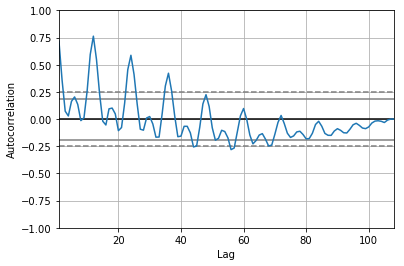

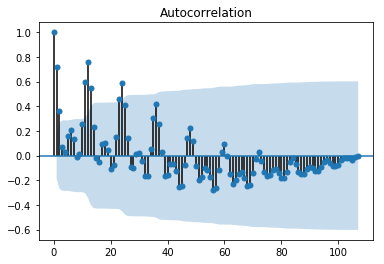

In [623]:

# autocorrelation in Time Series
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
series = pd.read_csv('monthly-car-sales-in-quebec-1960.csv', index_col="Month", parse_dates=True, header="infer")
series.columns = ['sales']
autocorrelation_plot(series)
plot_acf(series)
pyplot.show()


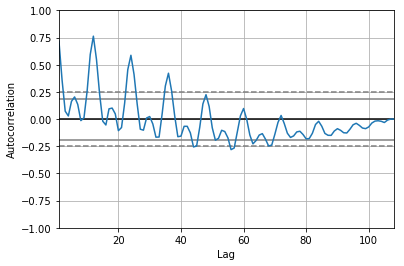

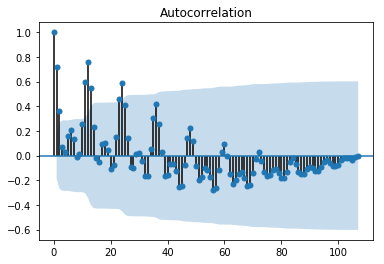

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
1960-06-01    13791
1960-07-01     9498
1960-08-01     8251
1960-09-01     7049
1960-10-01     9545
1960-11-01     9364
1960-12-01     8456
1961-01-01     7237
1961-02-01     9374
1961-03-01    11837
1961-04-01    13784
1961-05-01    15926
1961-06-01    13821
1961-07-01    11143
1961-08-01     7975
1961-09-01     7610
1961-10-01    10015
1961-11-01    12759
1961-12-01     8816
1962-01-01    10677
1962-02-01    10947
1962-03-01    15200
1962-04-01    17010
1962-05-01    20900
1962-06-01    16205
              ...  
1966-07-01    15388
1966-08-01    15113
1966-09-01    13401
1966-10-01    16135
1966-11-01    17562
1966-12-01    14720
1967-01-01    12225
1967-02-01    11608
1967-03-01    20985
1967-04-01    19692
1967-05-01    24081
1967-06-01    22114
1967-07-01    14220
1967-08-01    13434
1967-09-01    13598
1967-10-01    17187
1967-11-01    16119
1967-12-01    13713
1968-01-01    

In [620]:
from statsmodels.graphics.tsaplots import plot_acf
series = Series.from_csv('monthly-car-sales-in-quebec-1960.csv', header=0)
autocorrelation_plot(series)
plot_acf(series)
pyplot.show()
series